Benjamin Luo, 20890448, b33luo@uwaterloo.ca

__SYDE 780 Course Project - Data Analysis Output__

<hr />

# ___Data Exploration___

<hr />

## Data Loading

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("data/data_v5.csv")

In [2]:
print("=======\nColumns \n=======")

print(df.columns.values, "\n")

print("=============\nUnique values \n=============")

for column in df.columns:
    print("-", column, df[column].unique(), '\n')

print("======\nSample\n======")

df.head(3)

Columns 
['state_fips_code' 'sex' 'age_group' 'race_ethnicity' 'education_level'
 'income_category' 'marital_status' 'employment_status' 'uses_tobacco'
 'uses_e_cigarettes' 'days_drinking_alcohol' 'average_sleep_hours'
 'general_health' 'physical_health_not_good_days'
 'mental_health_not_good_days' 'diabetes_diagnosis' 'copd_diagnosis'
 'depression_diagnosis' 'asthma_diagnosis' 'body_mass_index'
 'primary_health_insurance' 'could_not_afford_medical_care'
 'last_doctor_visit' 'cvd'] 

Unique values 
- state_fips_code ['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'GU' 'PR' 'VI'] 

- sex ['Female' 'Male'] 

- age_group ['80+' '55-59' '40-44' '70-74' '65-69' '60-64' '75-79' '50-54' '45-49'
 '35-39' '30-34' '25-29' '18-24'] 

- race_ethnicity ['White' 'Black' 'Multiracial' 'Other' 

,state_fips_code,sex,age_group,race_ethnicity,education_level,income_category,marital_status,employment_status,uses_tobacco,uses_e_cigarettes,...,mental_health_not_good_days,diabetes_diagnosis,copd_diagnosis,depression_diagnosis,asthma_diagnosis,body_mass_index,primary_health_insurance,could_not_afford_medical_care,last_doctor_visit,cvd
0,AL,Female,80+,White,HS Grad,$25K-35K,Widowed,Self-Employed,Never,Never,...,0,No,No,No,No,26.57,Medicare,No,Never,0
1,AL,Female,55-59,White,College Grad,$100K-200K,Married,Retired,Never,Never,...,3,No,No,No,No,25.61,Employer Plan,No,<1yr,0
2,AL,Female,40-44,White,Some College,$25K-35K,Married,Homemaker,Never,Never,...,0,No,No,No,No,21.77,Military,No,<1yr,0


In [3]:
df.shape

(271802, 24)

## Exploring significance

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = 'cvd ~ ' + ' + '.join(df.columns.drop('cvd'))
model = smf.glm(formula=formula, data=df, family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    cvd   No. Observations:               271802
Model:                            GLM   Df Residuals:                   271675
Model Family:                Binomial   Df Model:                          126
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62881.
Date:                Sat, 12 Apr 2025   Deviance:                   1.2576e+05
Time:                        21:13:44   Pearson chi2:                 2.57e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1197
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -5.3350      0.470    -11.350      0.000      -6.256      -4.414
state_fips_code[T.AL]                         0.1494      0.092      1.630      0.103      -0.030       0.329
state_fips_code[T.AR]                         0.0290      0.089      0.326      0.744      -0.145       0.203
state_fips_code[T.AZ]                        -0.0566      0.080     -0.705      0.481      -0.214       0.101
state_fips_code[T.CA]                        -0.2210      0.088     -2.515      0.012      -0.393      -0.049
state_fips_code[T.CO]                        -0.2587      0.089     -2.892      0.004      -0.434      -0.083
state_fips_code[T.CT]                        -0.1340      0.087     -1.543      0.123      -0.304       0.036
state_fips_code[T.DC]                        -0.1641      0.127     -1.291      0.197      -0.413       0.085
state_fips_code[T.DE]                        -0.1184      0.103     -1.147      0.251      -0.321       0.084
state_fips_code[T.FL]                         0.0943      0.076      1.240      0.215      -0.055       0.243
state_fips_code[T.GA]                        -0.1139      0.084     -1.356      0.175      -0.279       0.051
state_fips_code[T.GU]                         0.0315      0.120      0.262      0.793      -0.204       0.267
state_fips_code[T.HI]                        -0.3763      0.088     -4.293      0.000      -0.548      -0.204
state_fips_code[T.IA]                        -0.1727      0.083     -2.073      0.038      -0.336      -0.009
state_fips_code[T.ID]                        -0.1507      0.093     -1.623      0.105      -0.333       0.031
state_fips_code[T.IL]                        -0.1564      0.105     -1.485      0.137      -0.363       0.050
state_fips_code[T.IN]                        -0.0117      0.081     -0.144      0.886      -0.171       0.148
state_fips_code[T.KS]                        -0.0918      0.080     -1.153      0.249      -0.248       0.064
state_fips_code[T.KY]                         0.0875      0.098      0.897      0.370      -0.104       0.279
state_fips_code[T.LA]                        -0.0793      0.091     -0.868      0.385      -0.258       0.100
state_fips_code[T.MA]                        -0.0283      0.085     -0.333      0.739      -0.195       0.138
state_fips_code[T.MD]                        -0.0560      0.077     -0.730      0.465      -0.206       0.094
state_fips_code[T.ME]                         0.0506      0.079      0.644      0.520      -0.104       0.205
state_fips_code[T.MI]                        -0.0994      0.082     -1.209      0.227      -0.260       0.062
state_fips_code[T.MN]                        -0.1118      0.077     -1.447      0.148      -0.263       0.040
sta

In [5]:
summary_table = model.summary().tables[1]

df_summary = pd.DataFrame(summary_table.data[1:], columns=summary_table.data[0])

df_summary['coef'] = df_summary['coef'].astype(float)
df_summary['P>|z|'] = df_summary['P>|z|'].astype(float)

df_significant = df_summary[(df_summary['P>|z|'] < 0.05) & (df_summary.index != 0)].reset_index(drop=True)

print("Statistically Significant Variables:")
df_significant

Statistically Significant Variables:


,,coef,std err,z,P>|z|,[0.025,0.975]
0,state_fips_code[T.CA],-0.2210,0.088,-2.515,0.012,-0.393,-0.049
1,state_fips_code[T.CO],-0.2587,0.089,-2.892,0.004,-0.434,-0.083
2,state_fips_code[T.HI],-0.3763,0.088,-4.293,0.000,-0.548,-0.204
3,state_fips_code[T.IA],-0.1727,0.083,-2.073,0.038,-0.336,-0.009
4,state_fips_code[T.MT],-0.2386,0.087,-2.749,0.006,-0.409,-0.068
5,state_fips_code[T.UT],-0.2605,0.088,-2.967,0.003,-0.433,-0.088
6,state_fips_code[T.VI],-0.7900,0.195,-4.048,0.000,-1.172,-0.408
7,state_fips_code[T.WA],-0.1774,0.073,-2.436,0.015,-0.320,-0.035
8,state_fips_code[T.WY],-0.2785,0.103,-2.704,0.007,-0.480,-0.077
9,sex[T.Male],0.8120,0.017,48.583,0.000,0.779,0.845


In [6]:
df_significant.to_csv("data/significance.csv", index=False)

## Correlations

### Numerical Correlations

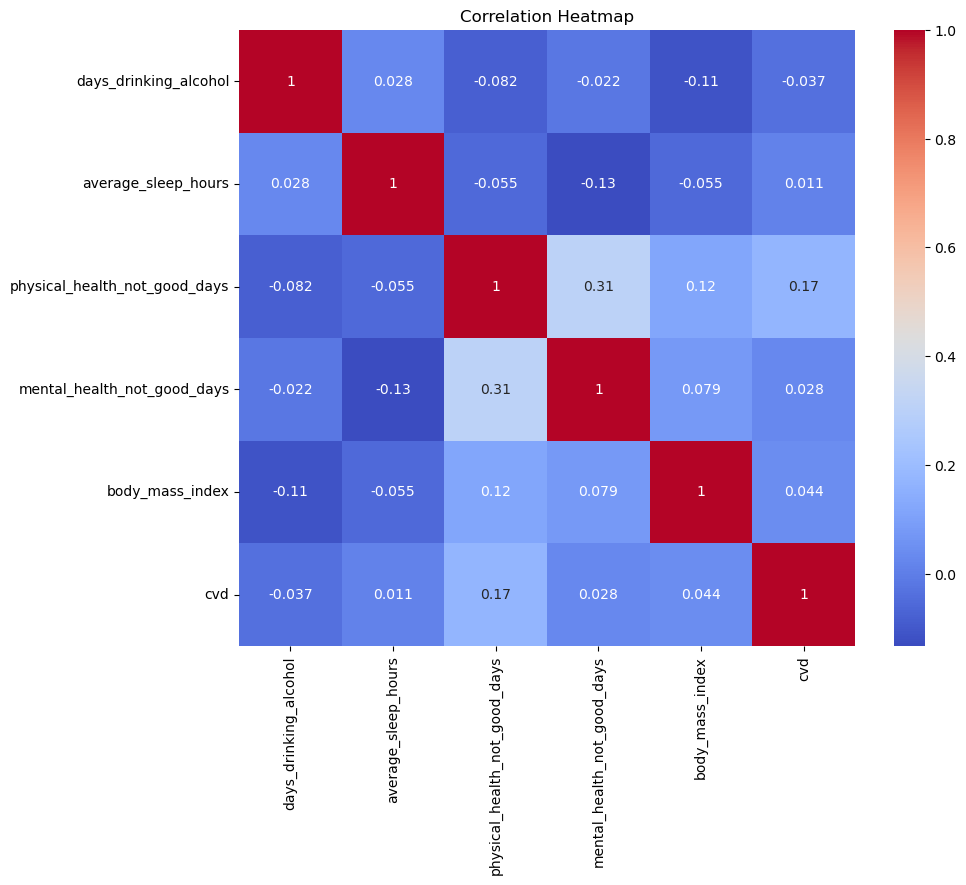

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['days_drinking_alcohol', 'average_sleep_hours', 
                  'physical_health_not_good_days', 'mental_health_not_good_days', 
                  'body_mass_index', 'cvd']

df_num = df[numerical_cols]

# Calculate correlation matrix
corr_matrix = df_num.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

### Categorical Correlations

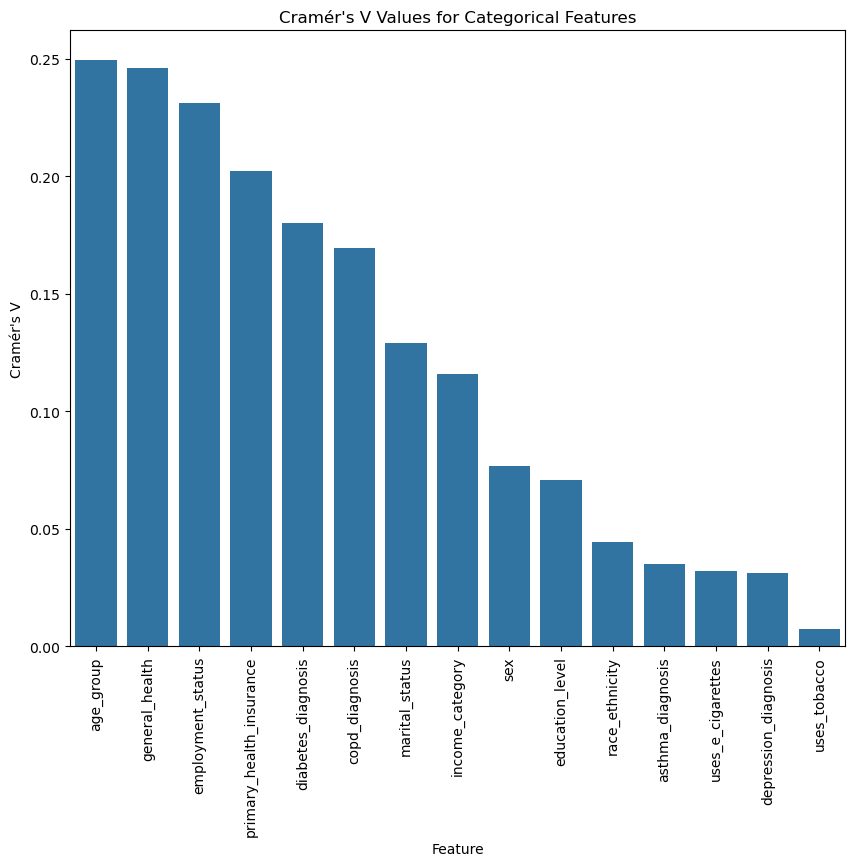

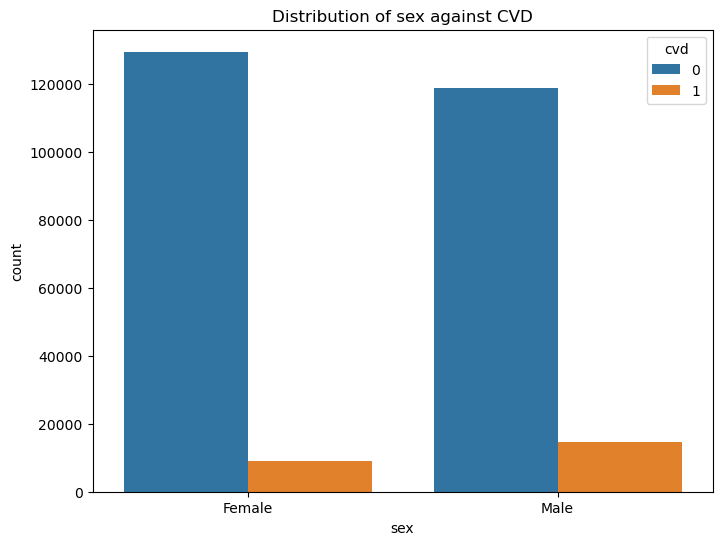

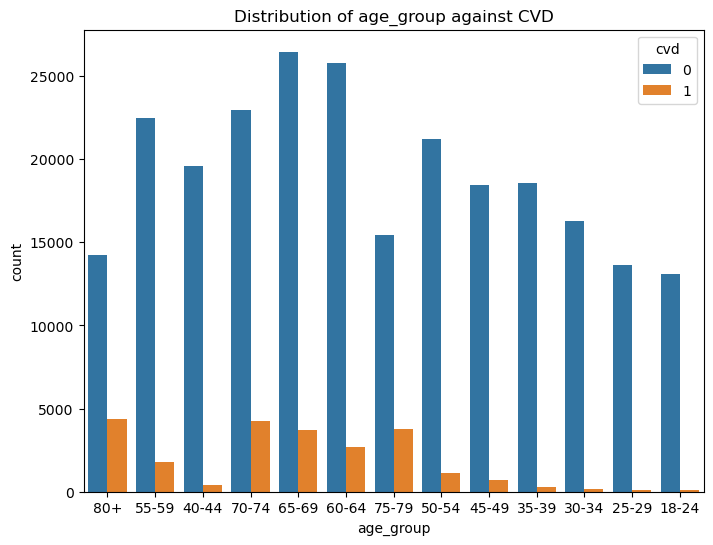

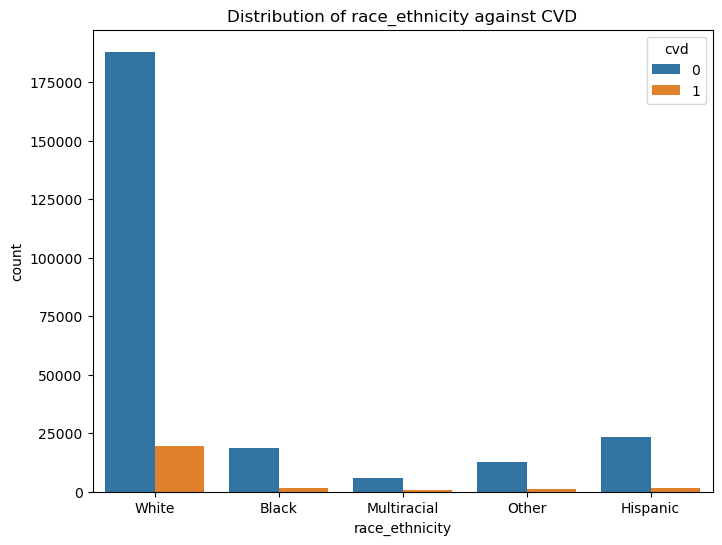

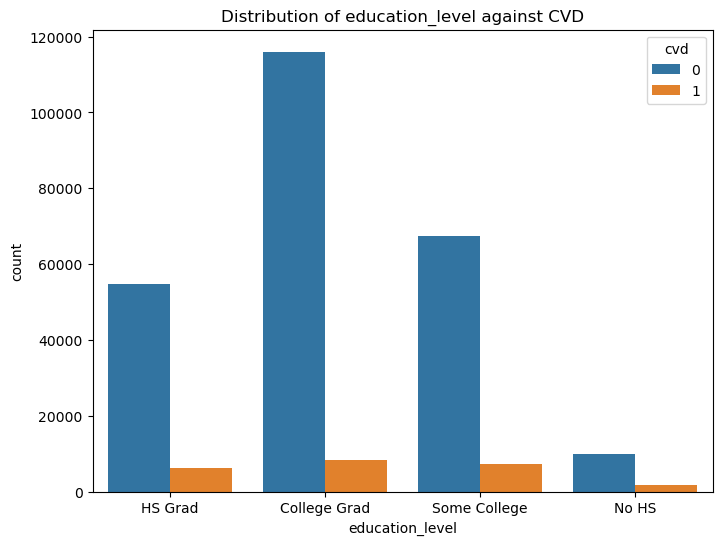

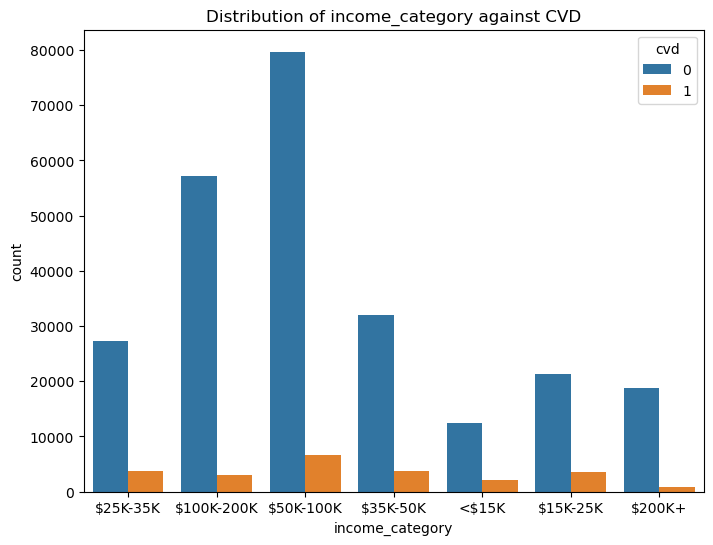

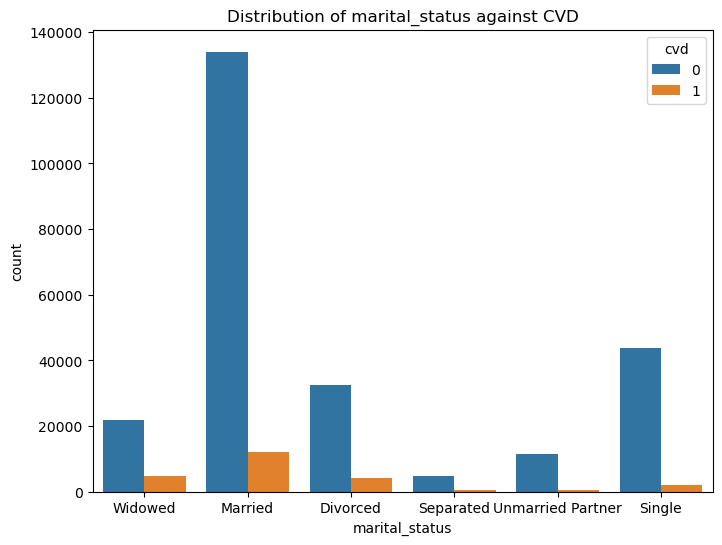

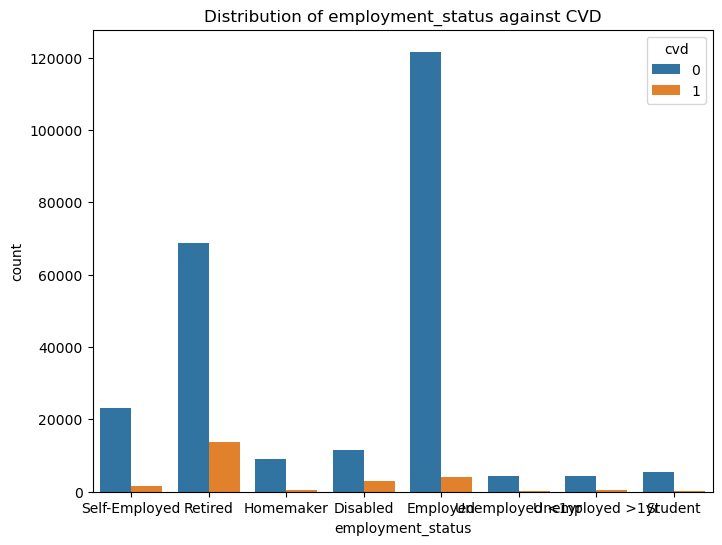

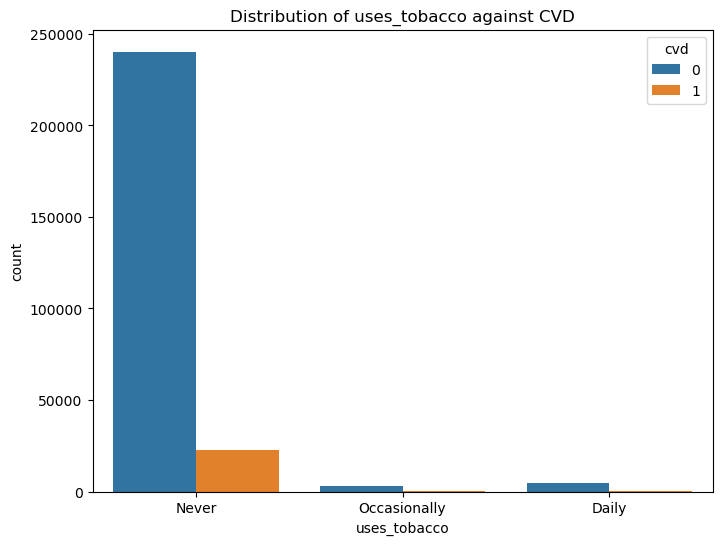

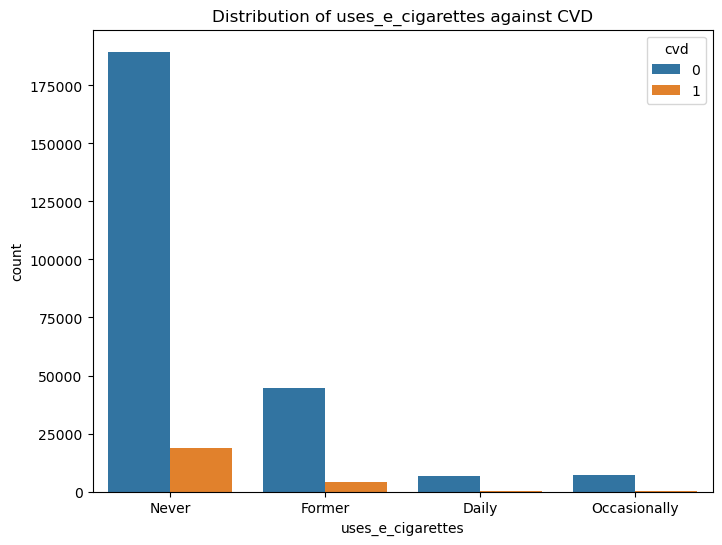

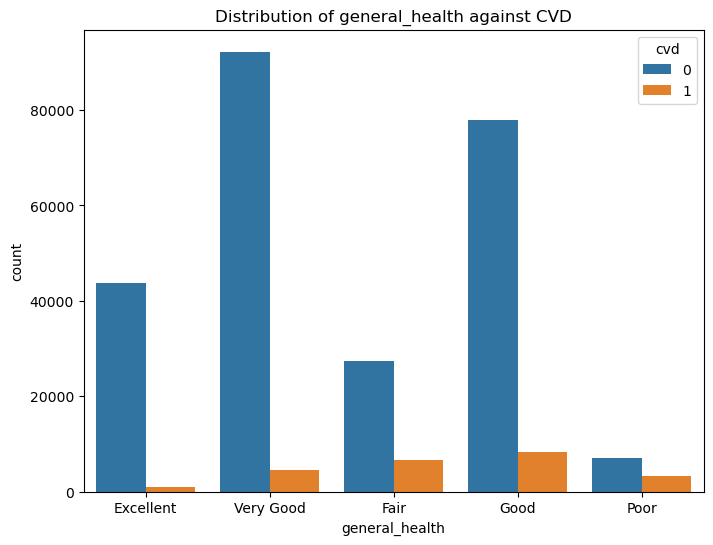

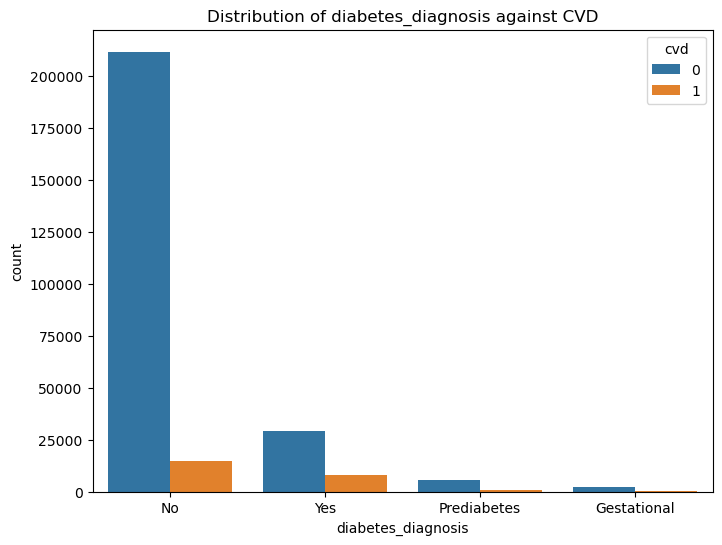

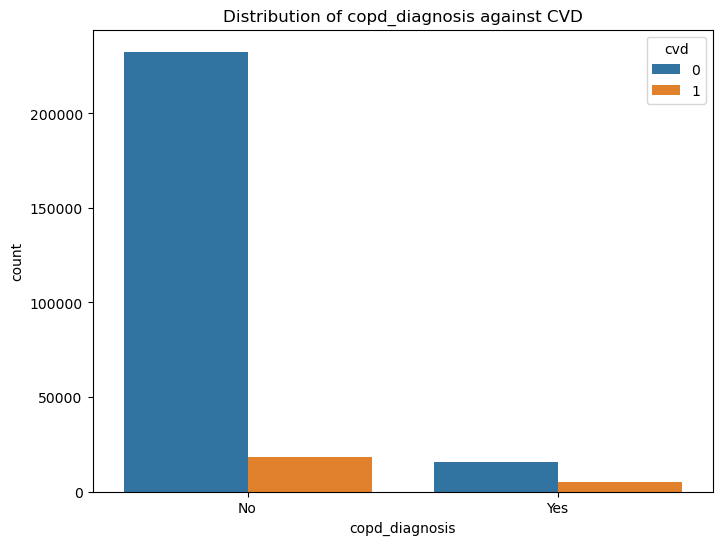

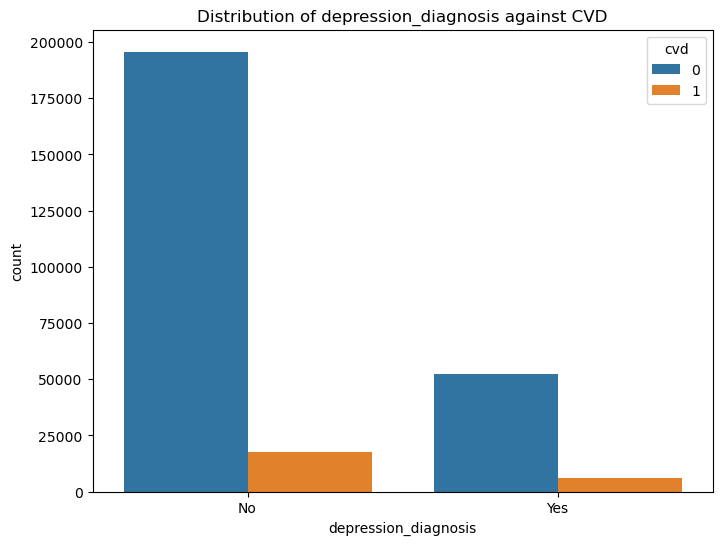

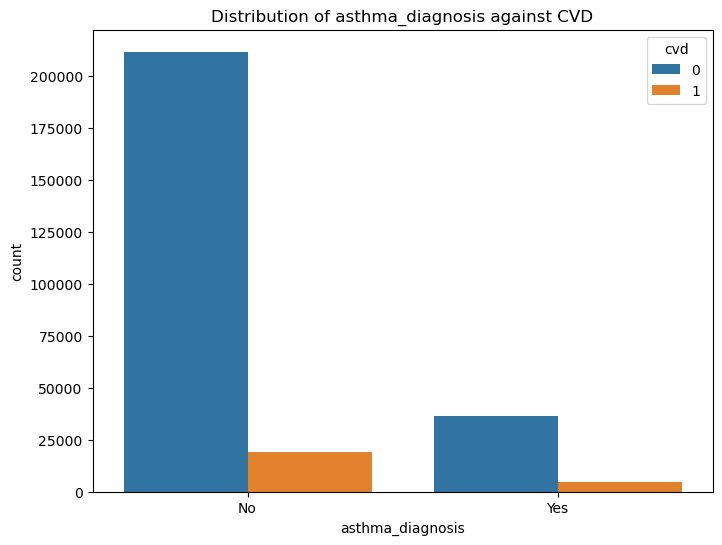

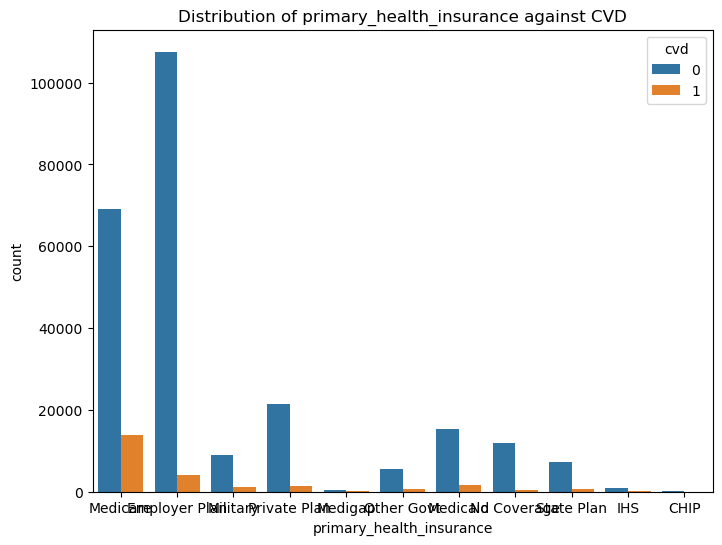

In [8]:
import numpy as np
from scipy.stats import chi2_contingency

# Select categorical columns
categorical_cols = ['sex', 'age_group', 'race_ethnicity', 'education_level', 
                    'income_category', 'marital_status', 'employment_status', 
                    'uses_tobacco', 'uses_e_cigarettes', 'general_health', 
                    'diabetes_diagnosis', 'copd_diagnosis', 'depression_diagnosis', 
                    'asthma_diagnosis', 'primary_health_insurance']

def cramers_V(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramers_V_values = []
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['cvd'])
    cramers_V_value = cramers_V(contingency_table)
    cramers_V_values.append(cramers_V_value)

# Create a DataFrame with Cramér's V values
cramers_V_df = pd.DataFrame({'Feature': categorical_cols, 'Cramér\'s V': cramers_V_values})

# Sort the DataFrame by Cramér's V values in descending order
cramers_V_df = cramers_V_df.sort_values(by='Cramér\'s V', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Feature', y='Cramér\'s V', data=cramers_V_df)
plt.title('Cramér\'s V Values for Categorical Features')
plt.xticks(rotation=90)
plt.show()

# Create bar plots for each categorical feature against 'cvd'
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='cvd', data=df)
    plt.title(f'Distribution of {col} against CVD')
    plt.show()

## Distributions

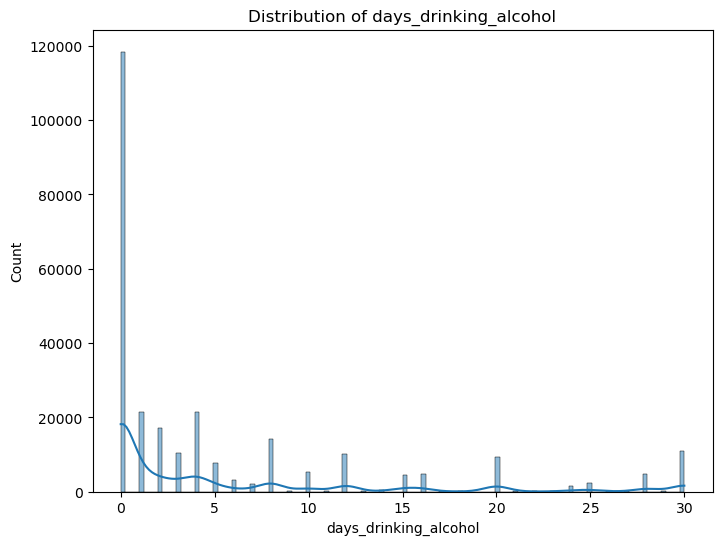

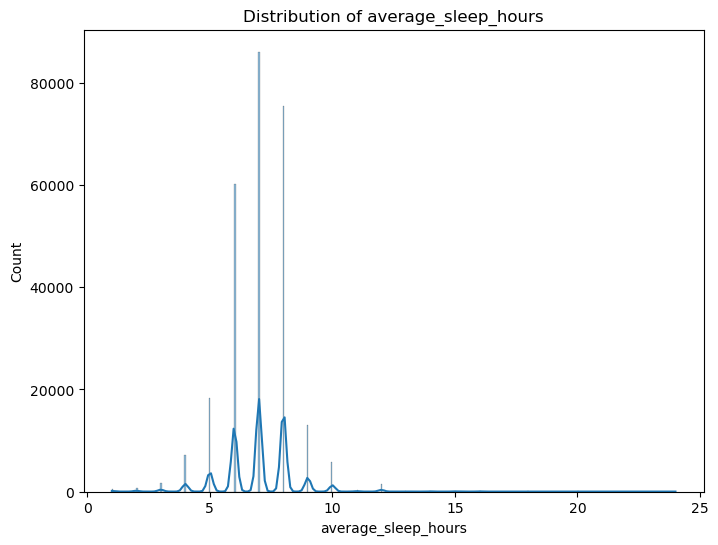

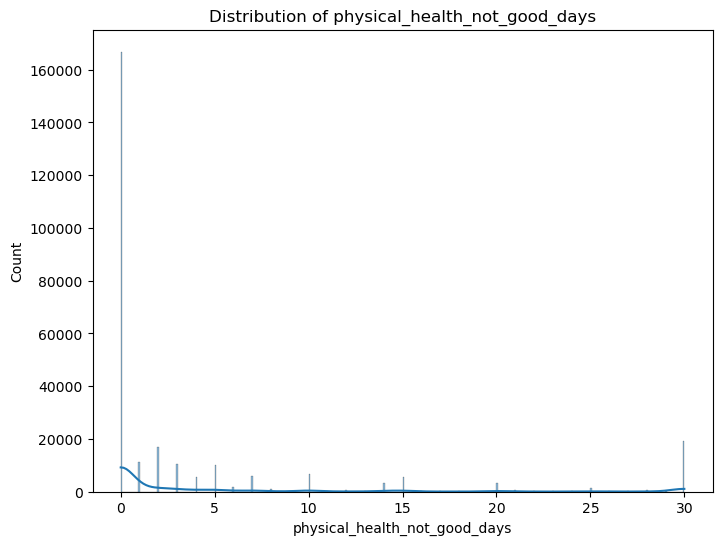

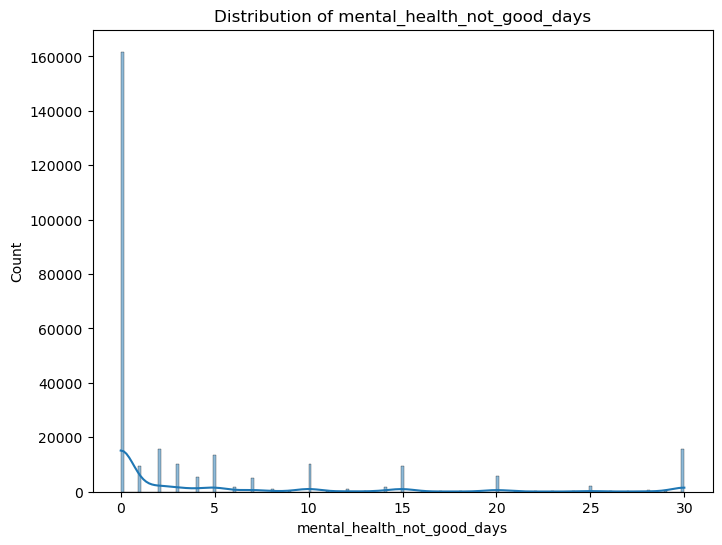

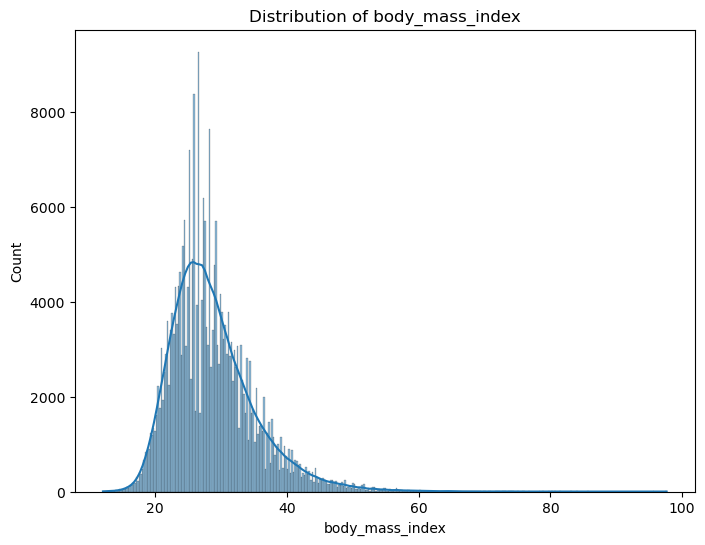

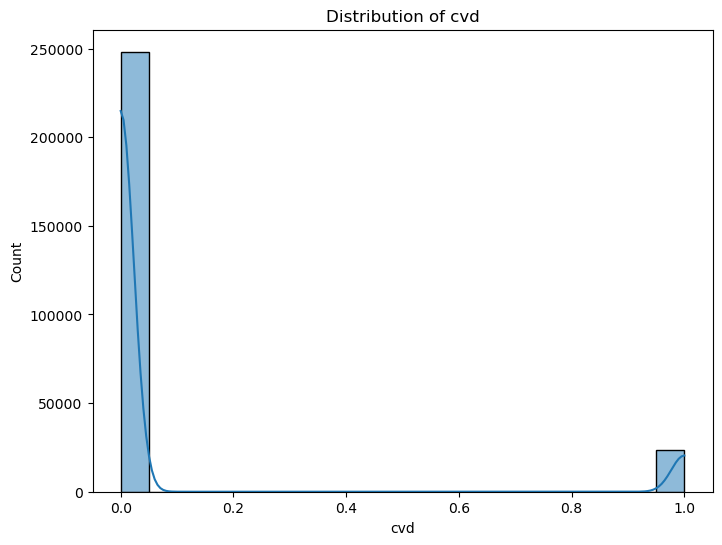

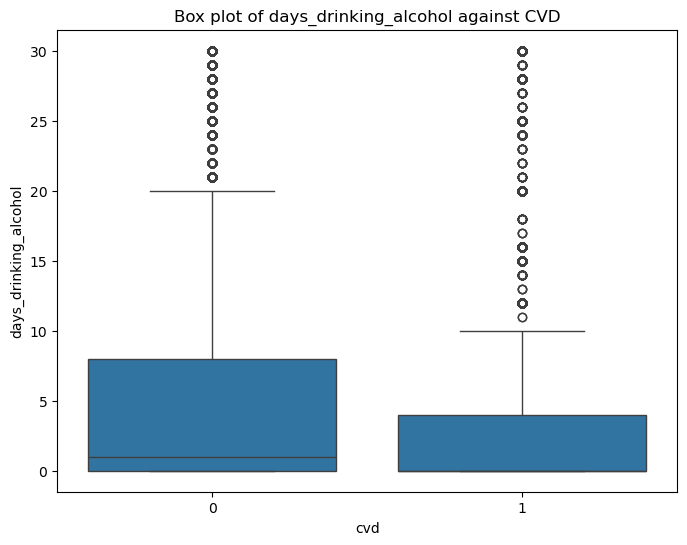

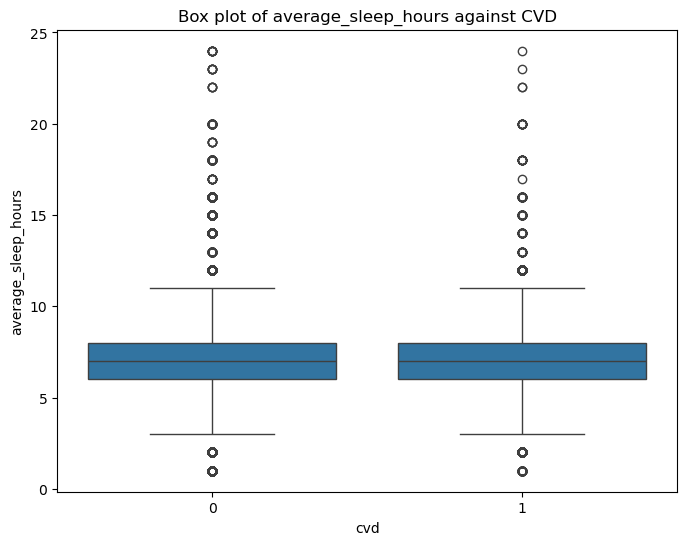

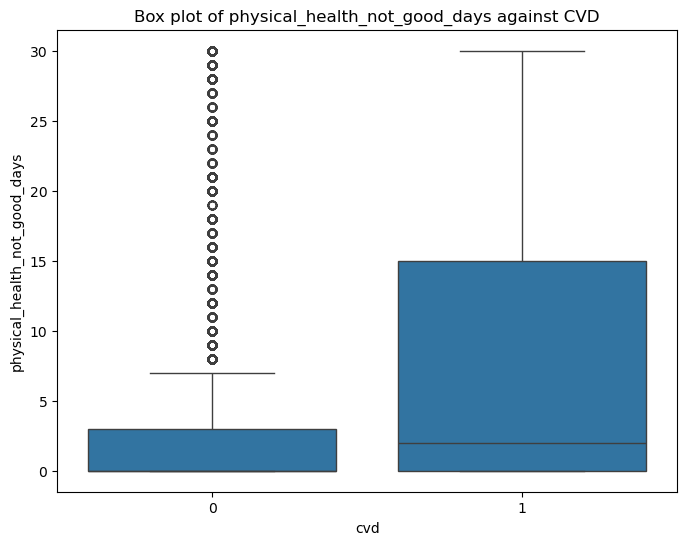

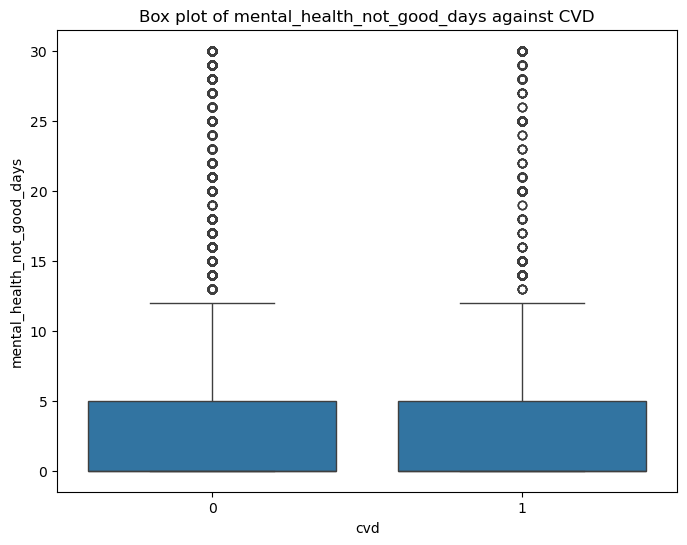

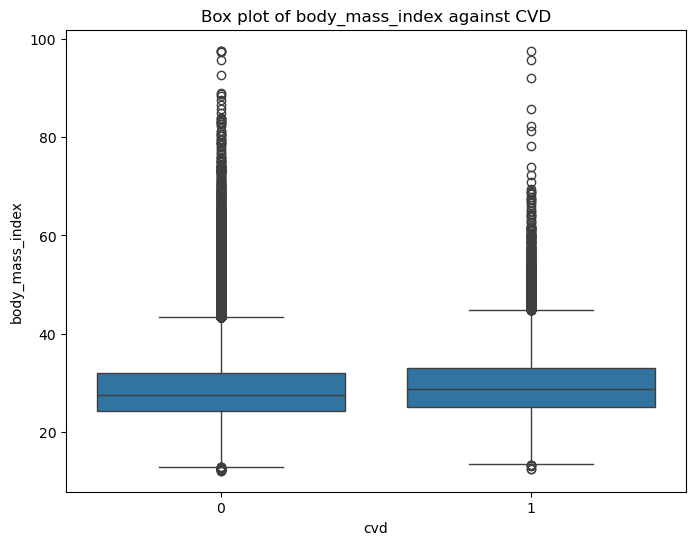

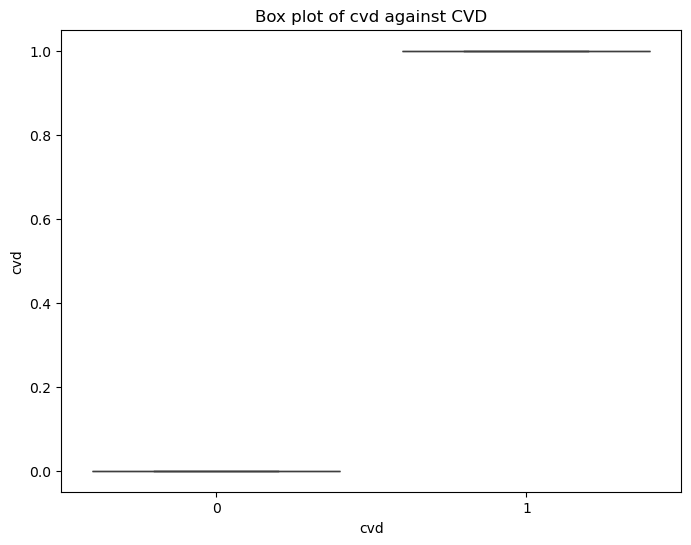

In [9]:
# Histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Box plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cvd', y=col, data=df)
    plt.title(f'Box plot of {col} against CVD')
    plt.show()

## Feature Importance

In [10]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Combine numerical and encoded categorical columns
combined_df = pd.concat([df[numerical_cols], encoded_df], axis=1)

# Calculate mutual information
mutual_info = mutual_info_classif(combined_df, df['cvd'], random_state=42)

# Create a DataFrame with mutual information values
mutual_info_df = pd.DataFrame({'Feature': combined_df.columns, 'Mutual Information': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)
print(mutual_info_df)

                               Feature  Mutual Information
5                                  cvd            0.296340
118              diabetes_diagnosis_No            0.059439
143             last_doctor_visit_<1yr            0.052987
98          employment_status_Employed            0.052911
106                 uses_tobacco_Never            0.051573
..                                 ...                 ...
20                  state_fips_code_ID            0.000000
21                  state_fips_code_IL            0.000000
22                  state_fips_code_IN            0.000000
104  employment_status_Unemployed >1yr            0.000000
43                  state_fips_code_OK            0.000000

[145 rows x 2 columns]


## Dimensionality Reduction

### PCA (linear)

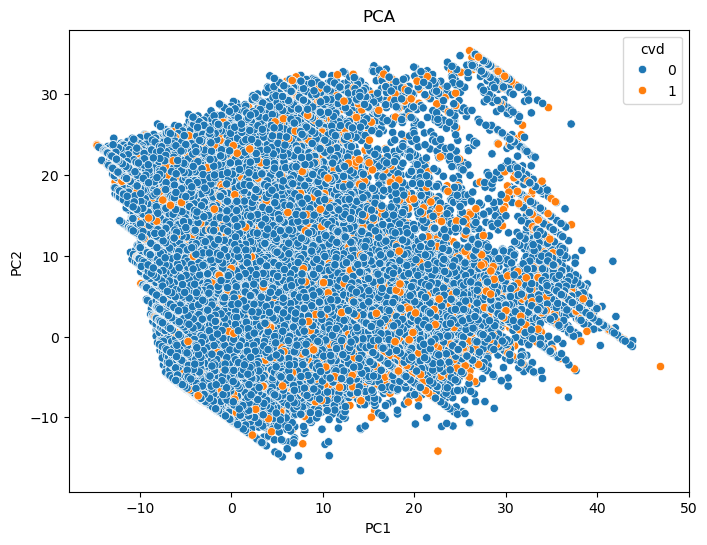

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(df[numerical_cols])
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['cvd'] = df['cvd']
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cvd', data=pca_df)
plt.title('PCA')
plt.show()

### t-SNE (non-linear)

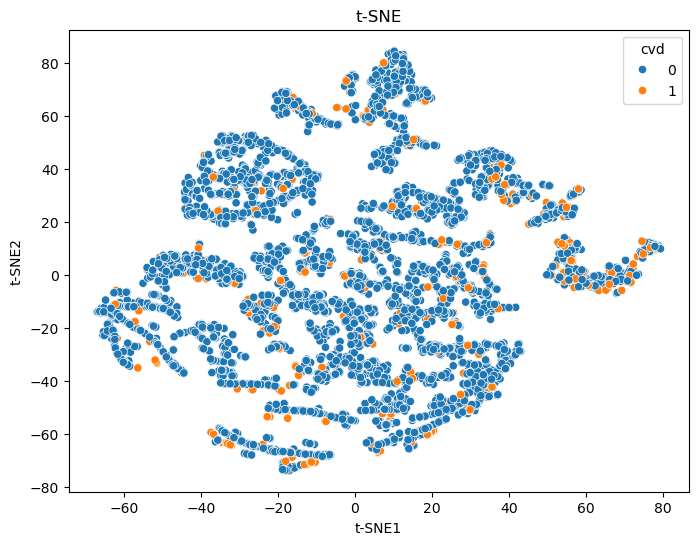

In [12]:
# t-SNE

# Random sampling due to long runtime
sample_idx = df.sample(n=5000, random_state=42).index
sample_numerical = df.loc[sample_idx, numerical_cols]
sample_cvd = df.loc[sample_idx, 'cvd']

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(sample_numerical)
tsne_df = pd.DataFrame(tsne_data, columns=['t-SNE1', 't-SNE2'])
tsne_df['cvd'] = sample_cvd.values
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='cvd', data=tsne_df)
plt.title('t-SNE')
plt.show()

## Outlier Detection

2718 of the 269084 datapoints are outliers

In [13]:
from sklearn.ensemble import IsolationForest

# Isolation Forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = isolation_forest.fit_predict(df[numerical_cols])
outlier_df = pd.DataFrame({'Outlier': outliers})
print(outlier_df['Outlier'].value_counts())

Outlier
 1    269084
-1      2718
Name: count, dtype: int64


## Disaggregation

Done via Tableau

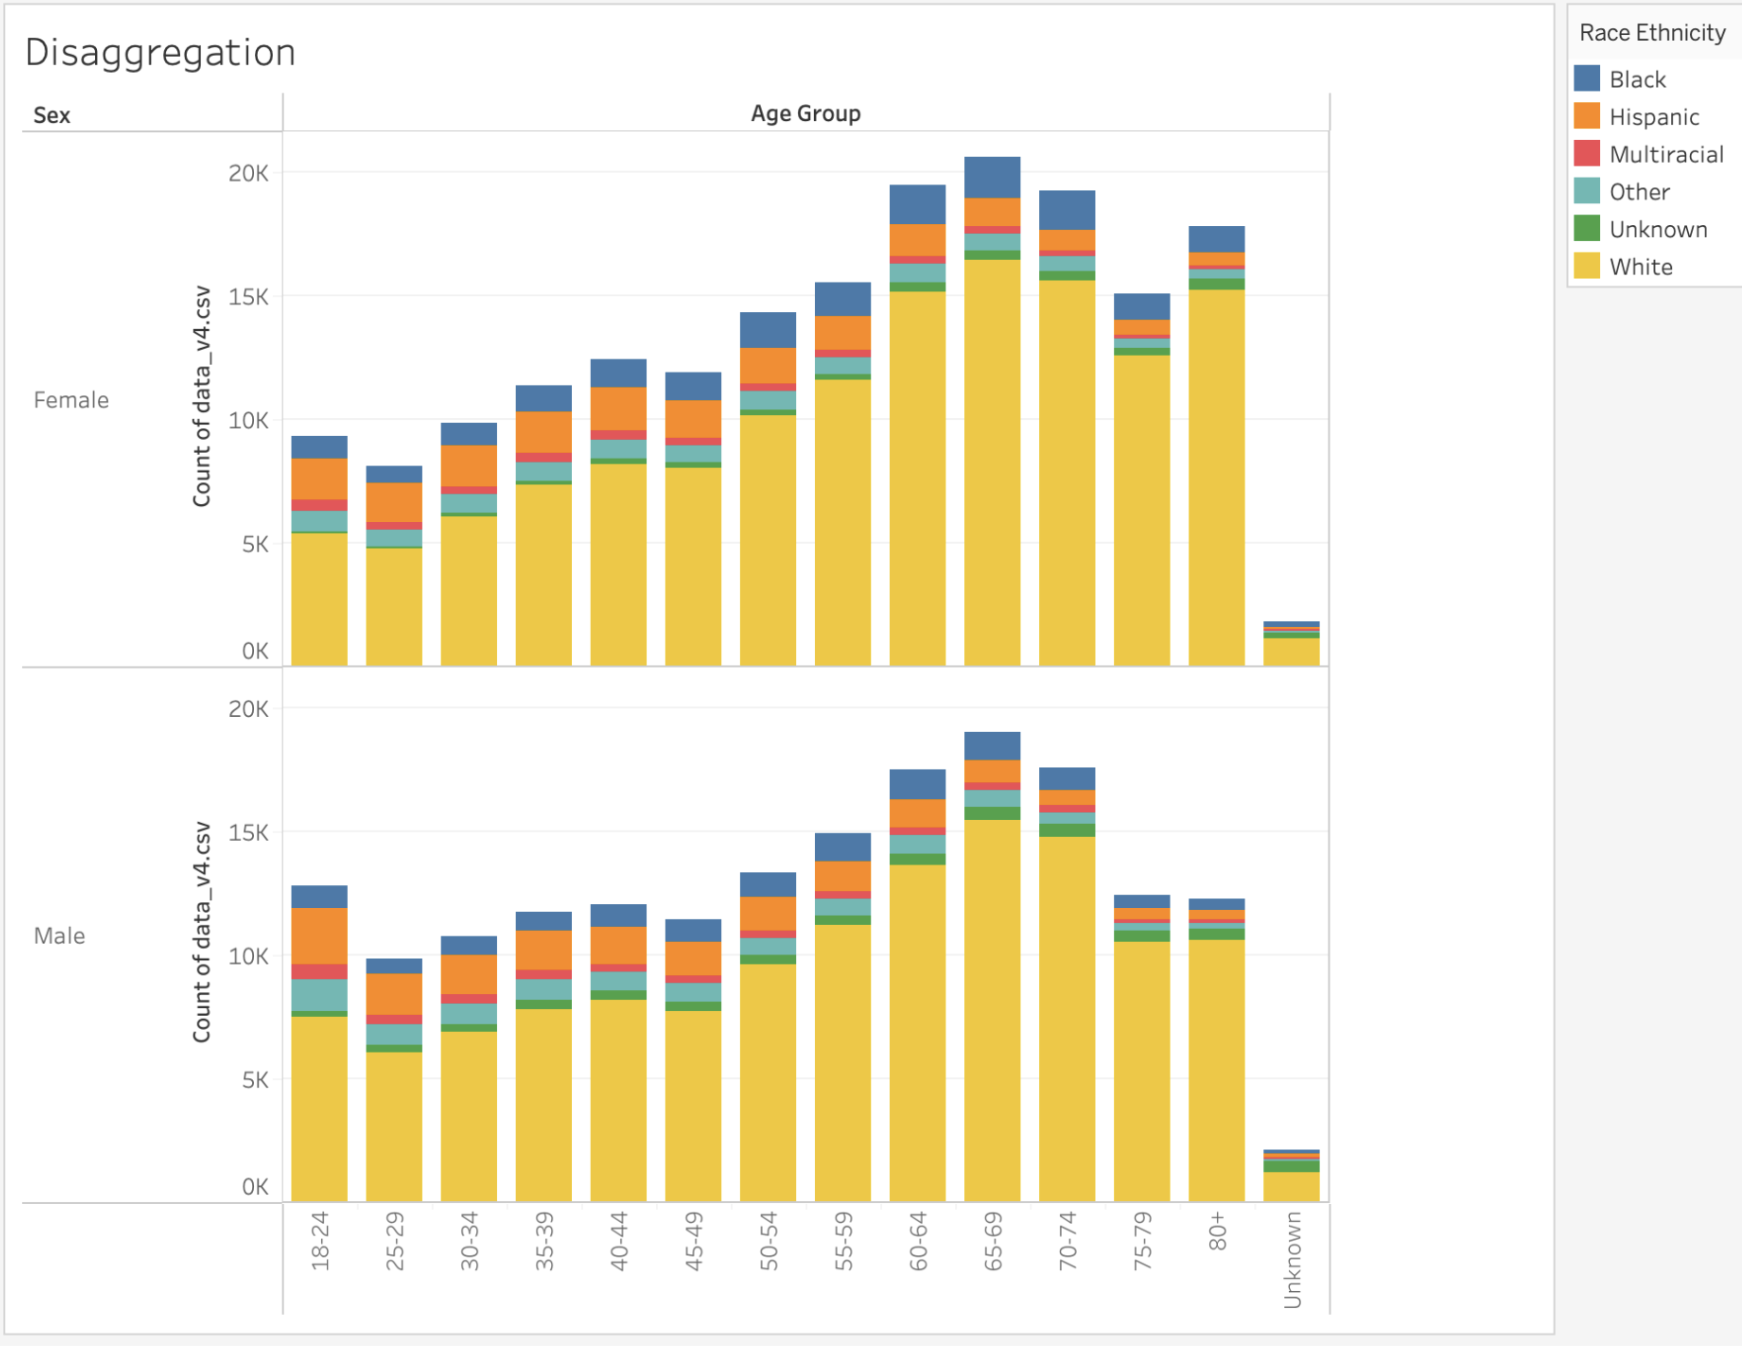

<hr />

# ___Data Analysis___

<hr />

## __RQ1: Demographics__

State,
Sex,
Age,
Race/Ethnicity,
BMI

### Logistic Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

demographic_features = ['sex', 'age_group', 'race_ethnicity', 'body_mass_index', 'state_fips_code']
target = 'cvd'

categorical_features = ['sex', 'age_group', 'race_ethnicity', 'state_fips_code']
numerical_features = ['body_mass_index']

X = df[demographic_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categories
])

# Preprocessing pipeline for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Handle missing values
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Create pipeline with preprocessing and logistic regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9148102499954012

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     49731
           1       0.43      0.00      0.00      4630

    accuracy                           0.91     54361
   macro avg       0.67      0.50      0.48     54361
weighted avg       0.87      0.91      0.87     54361



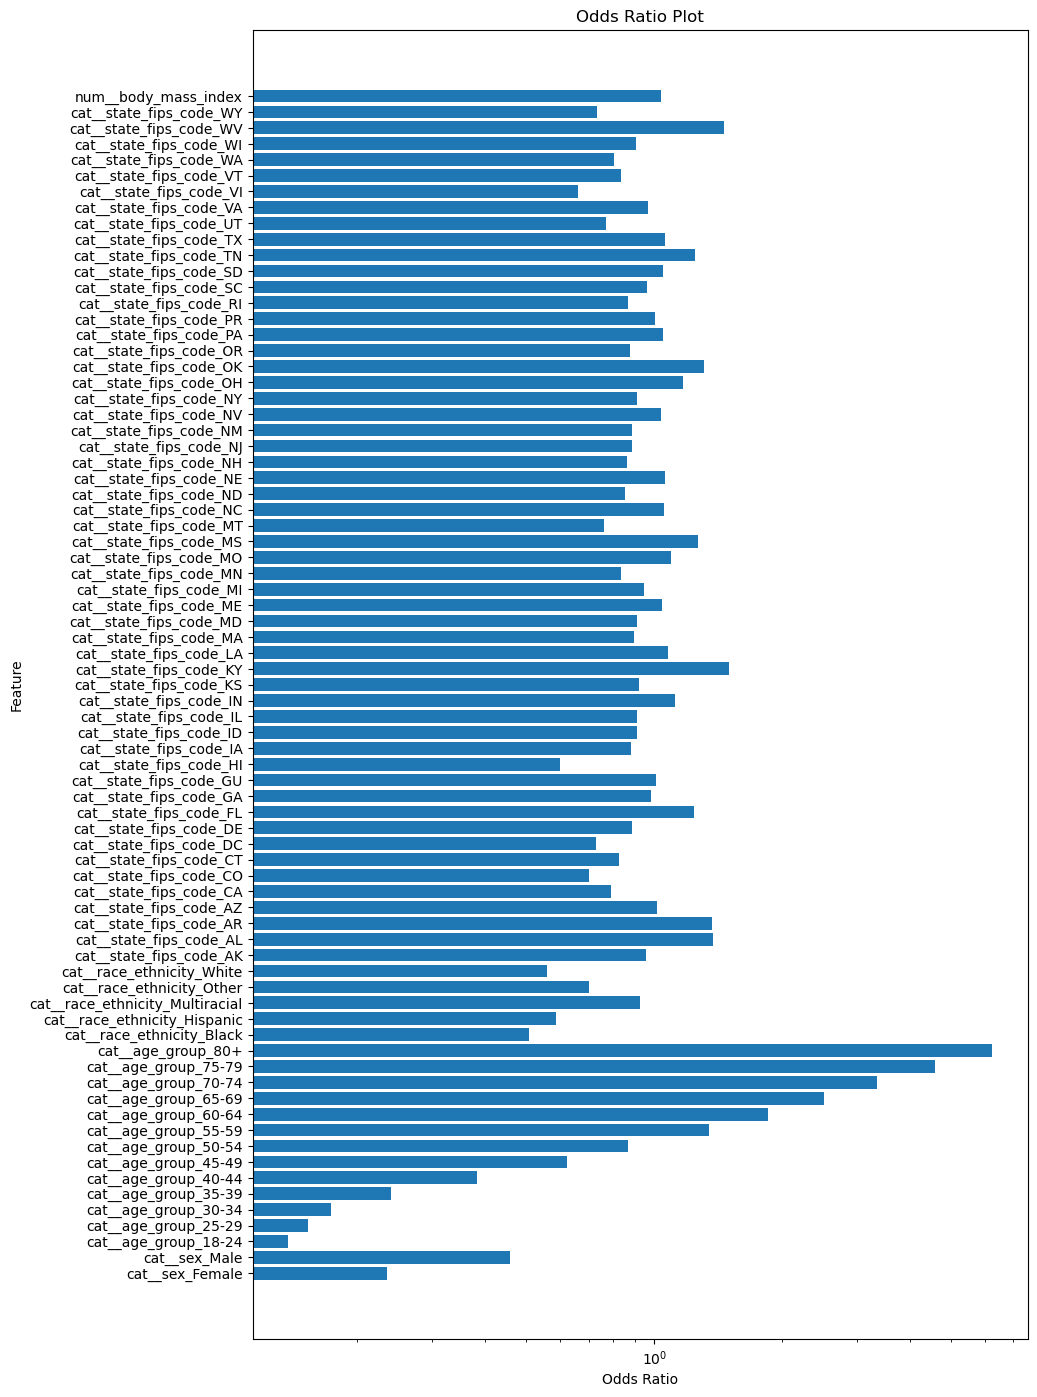

In [15]:
coefficients = model.named_steps['classifier'].coef_[0]
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Calculate the odds ratios
odds_ratios = np.exp(coefficients)

# Plot the odds ratios
plt.figure(figsize=(10, 17))
plt.barh(feature_names, odds_ratios)
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.title('Odds Ratio Plot')
plt.xscale('log')  # Use log scale for better visualization
plt.show()

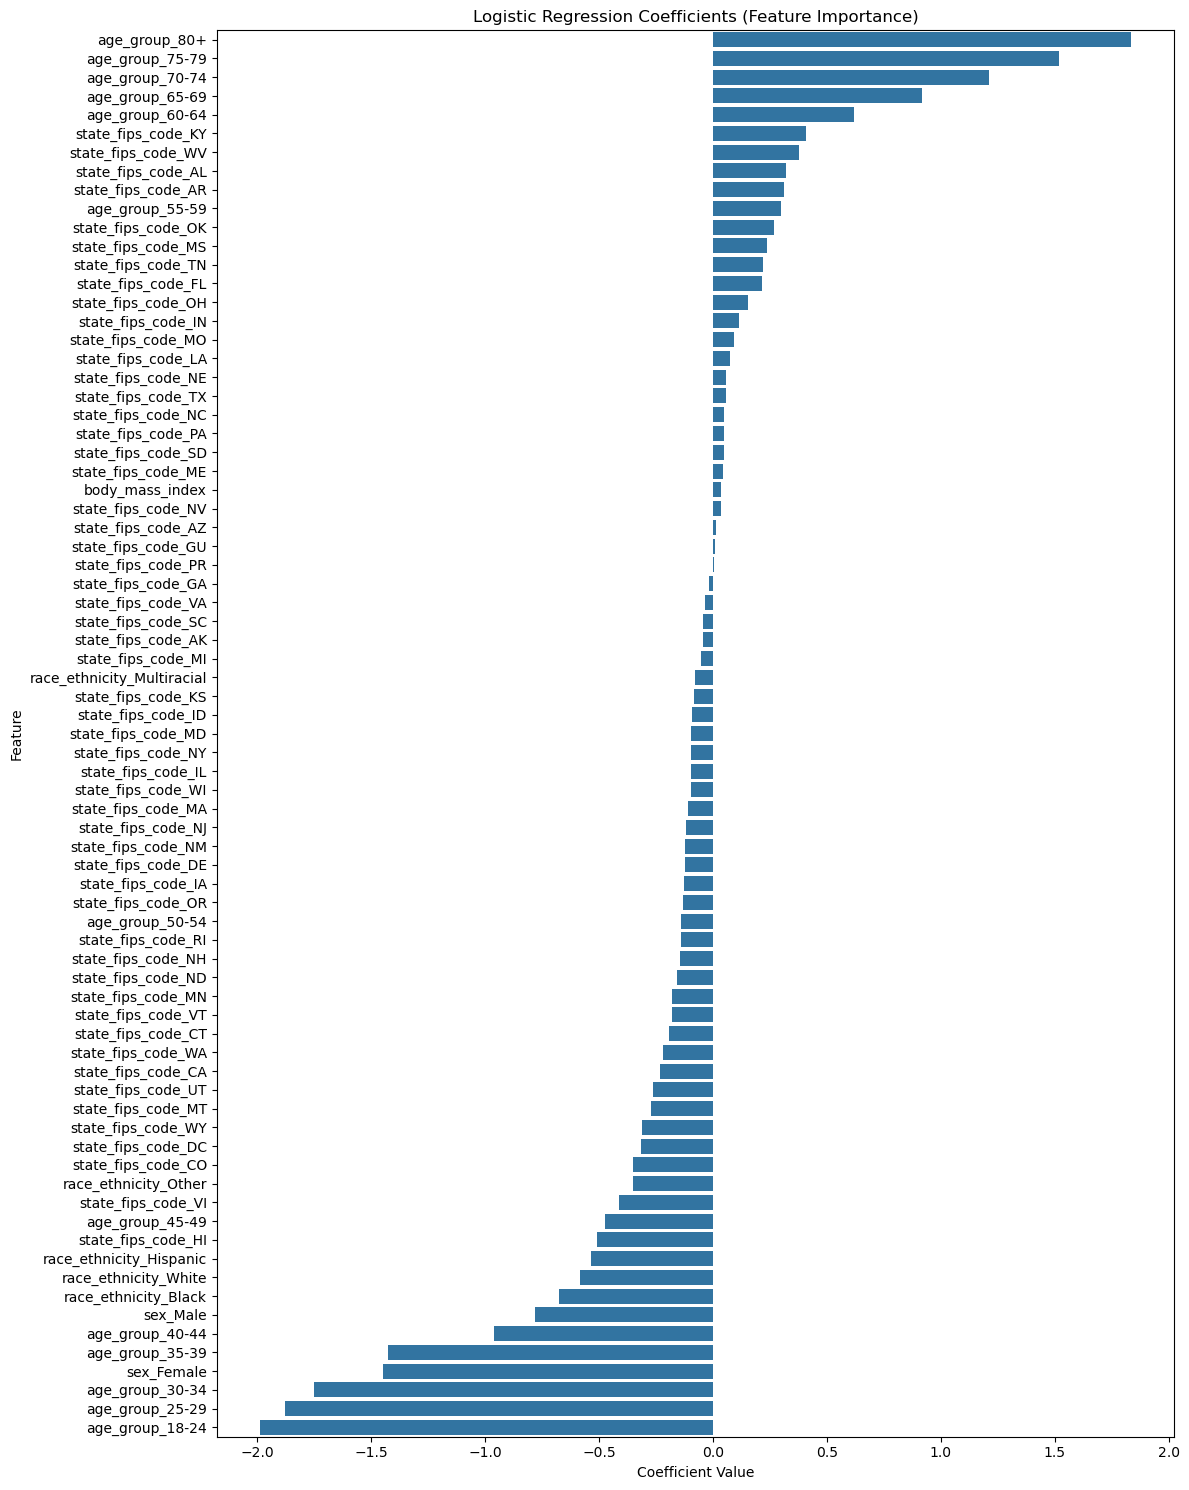

In [16]:
# Get the logistic regression model from the pipeline
log_reg = model.named_steps['classifier']

# Get feature names after one-hot encoding
categorical_features = ['sex', 'age_group', 'race_ethnicity', 'state_fips_code']
ohe_features = model.named_steps['preprocessor'].transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_features)
numerical_features = ['body_mass_index']

# Combine feature names
feature_names = list(ohe_features) + numerical_features

# Create a DataFrame of coefficients
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': log_reg.coef_[0]
}).sort_values('coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 15))
sns.barplot(x='coefficient', y='feature', data=coef_df)
plt.title('Logistic Regression Coefficients (Feature Importance)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

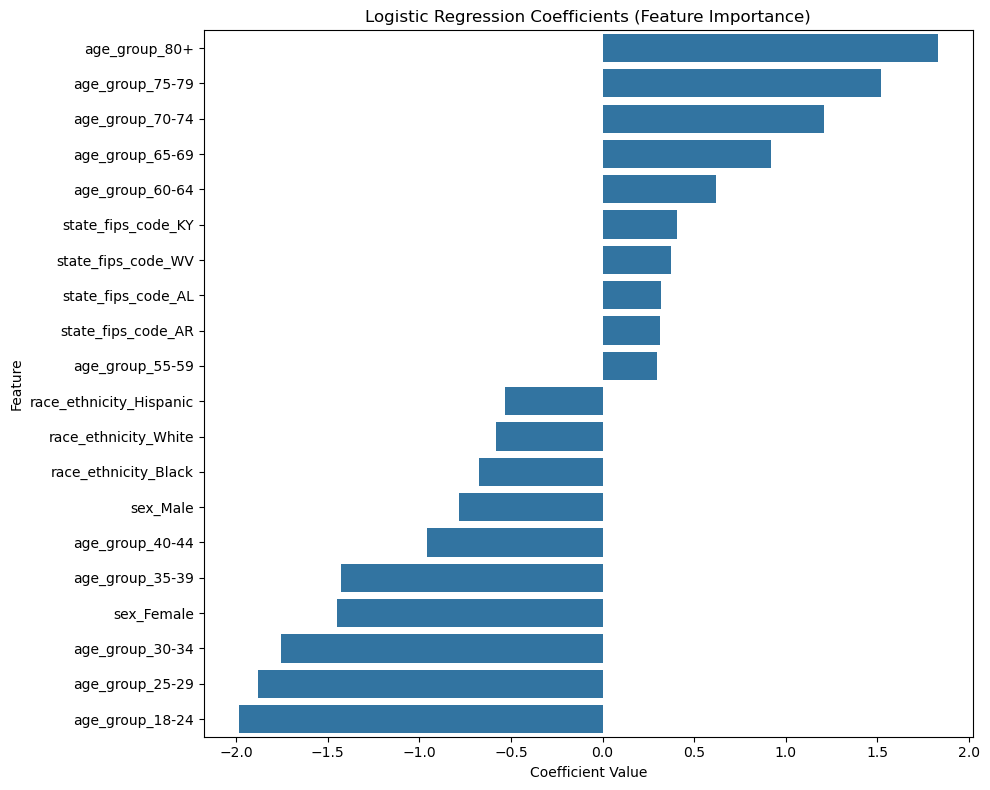

In [17]:
top_n = 10
top_features = coef_df.nlargest(top_n, 'coefficient')
bottom_features = coef_df.nsmallest(top_n, 'coefficient').iloc[::-1]
plot_df = pd.concat([top_features, bottom_features])

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='coefficient', y='feature', data=plot_df)
plt.title('Logistic Regression Coefficients (Feature Importance)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

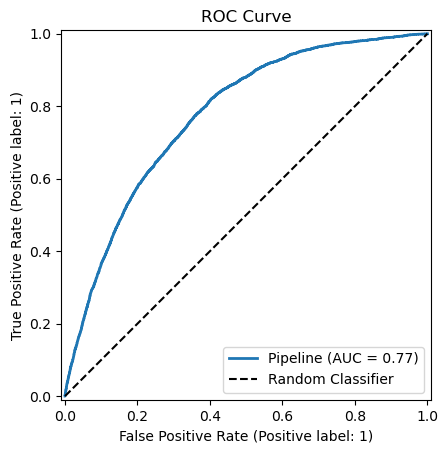

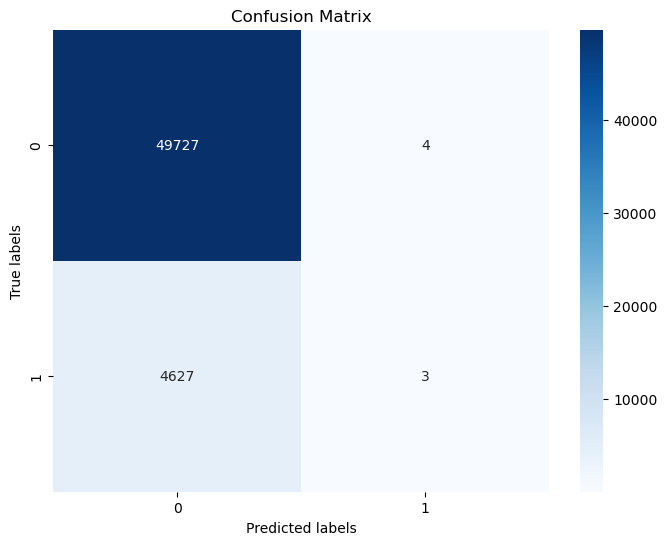

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, roc_curve, RocCurveDisplay,
                            precision_recall_curve, average_precision_score)
from sklearn.calibration import calibration_curve

# ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(model, X_test, y_test, lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Descriptive Statistics for Intra-Group Comparisons (Male v Female CVD Prevalence)

In [19]:
# Calculate CVD prevalence by category
for feature in demographic_features:
    print(f"\nCVD prevalence by {feature}:")
    print(df.groupby(feature)['cvd'].mean().sort_values())


CVD prevalence by sex:
sex
Female    0.065597
Male      0.108858
Name: cvd, dtype: float64

CVD prevalence by age_group:
age_group
18-24    0.006605
25-29    0.008511
30-34    0.010319
35-39    0.015020
40-44    0.021542
45-49    0.035610
50-54    0.051337
55-59    0.074781
60-64    0.095382
65-69    0.123879
70-74    0.156759
75-79    0.195405
80+      0.235367
Name: cvd, dtype: float64

CVD prevalence by race_ethnicity:
race_ethnicity
Hispanic       0.054720
Other          0.067134
Black          0.072959
Multiracial    0.087538
White          0.093210
Name: cvd, dtype: float64

CVD prevalence by body_mass_index:
body_mass_index
12.05    0.0
63.27    0.0
38.86    0.0
63.30    0.0
38.80    0.0
        ... 
62.69    1.0
39.07    1.0
25.60    1.0
72.31    1.0
54.94    1.0
Name: cvd, Length: 3566, dtype: float64

CVD prevalence by state_fips_code:
state_fips_code
VI    0.039397
DC    0.051733
CO    0.054234
UT    0.061040
CA    0.062596
IL    0.065799
HI    0.067575
MA    0.068649
OR   

In [20]:
# Statistical test on whether males have a higher CVD prevalence than females

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['cvd'])

# Filter the contingency table to only include 'Male' and 'Female'
male_female_contingency_table = contingency_table.loc[['Male', 'Female']]

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(male_female_contingency_table)

print("Chi-squared statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between sex (Male/Female) and CVD.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between sex (Male/Female) and CVD.")

# Calculate proportions
male_cvd_proportion = df[df['sex'] == 'Male']['cvd'].mean()
female_cvd_proportion = df[df['sex'] == 'Female']['cvd'].mean()

print("Proportion of males with CVD:", male_cvd_proportion)
print("Proportion of females with CVD:", female_cvd_proportion)

if male_cvd_proportion > female_cvd_proportion:
    print("Males have a higher proportion of CVD.")
elif male_cvd_proportion < female_cvd_proportion:
    print("Females have a higher proportion of CVD.")
else:
    print("Males and females have the same proportion of CVD.")

Chi-squared statistic: 1602.8828048936043
p-value: 0.0
Reject the null hypothesis: There is a significant association between sex (Male/Female) and CVD.
Proportion of males with CVD: 0.10885756932516258
Proportion of females with CVD: 0.06559744658111943
Males have a higher proportion of CVD.


## __RQ2: Socioeconomics__

Education, Income, Marital Status, Employment, Health Insurance, Affordable acesss to care

### Random Forest Classifier

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

socioeconomic_features = [
    'education_level',
    'income_category',
    'marital_status',
    'employment_status',
    'primary_health_insurance',
    'could_not_afford_medical_care'
]

print("Class distribution:\n", df['cvd'].value_counts(normalize=True))

# 1. Handle class imbalance
X = df[socioeconomic_features]
y = df['cvd']

# Encode categorical variables
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 2. Adjust model parameters for better sensitivity
rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',  # Give more weight to minority class
    max_depth=8,
    min_samples_split=5,
    random_state=42
)

# Train model
# rf_model.fit(X_train, y_train)
rf_model.fit(X_train_res, y_train_res)

# 3. Adjust prediction threshold based on ROC curve
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Find optimal threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Make predictions using optimal threshold
y_pred = (y_probs >= optimal_threshold).astype(int)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Class distribution:
 cvd
0    0.913183
1    0.086817
Name: proportion, dtype: float64


/var/folders/l8/p53ms28n1791d89nx84s38x00000gn/T/ipykernel_4555/1365411603.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
/var/folders/l8/p53ms28n1791d89nx84s38x00000gn/T/ipykernel_4555/1365411603.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
/var/folders/l8/p53ms28n1791d89nx84s38x00000gn/T/ipykernel_4555/1365411603.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.62      0.76     74462
           1       0.16      0.78      0.27      7079

    accuracy                           0.64     81541
   macro avg       0.57      0.70      0.51     81541
weighted avg       0.90      0.64      0.71     81541



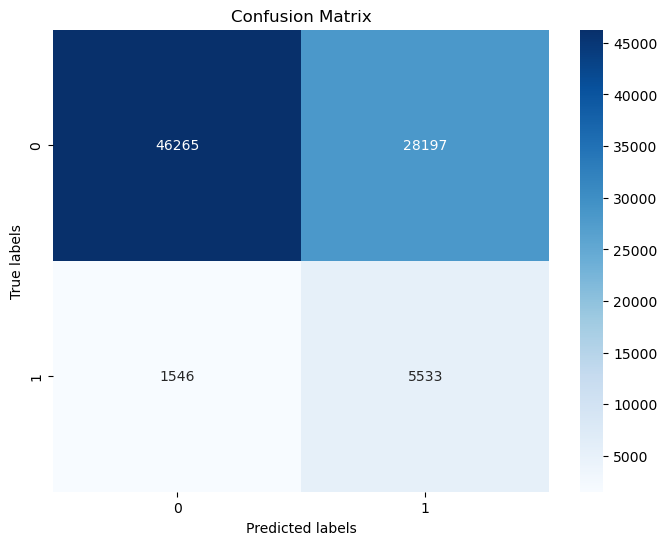

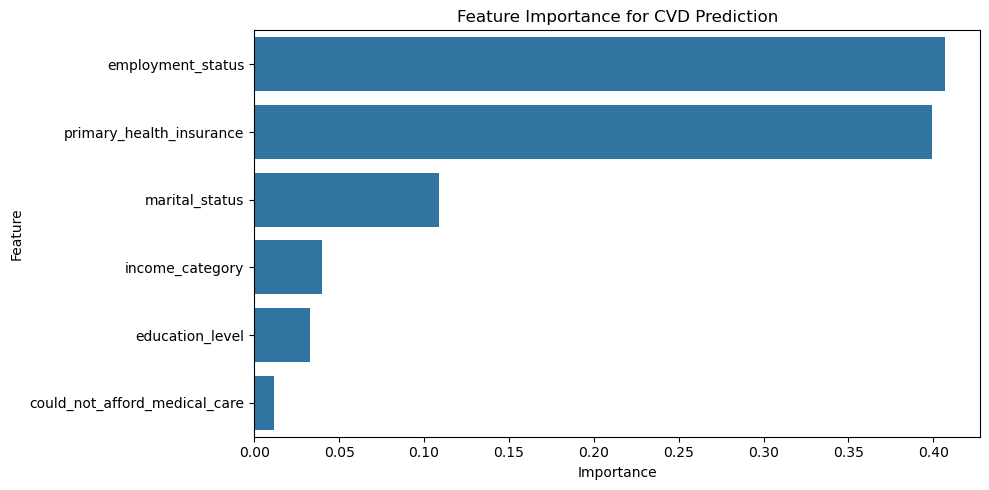

In [22]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': socioeconomic_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for CVD Prediction')
plt.tight_layout()
plt.show()

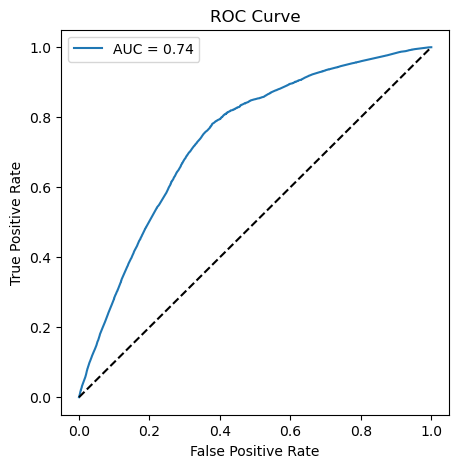

In [23]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Disaggregation on Employment Status


Using 'Self-Employed' as reference category

Fitting logistic regression model...
Optimization terminated successfully.
         Current function value: 0.269069
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    cvd   No. Observations:               271802
Model:                          Logit   Df Residuals:                   271794
Method:                           MLE   Df Model:                            7
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                 0.08824
Time:                        21:15:46   Log-Likelihood:                -73134.
converged:                       True   LL-Null:                       -80212.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const  

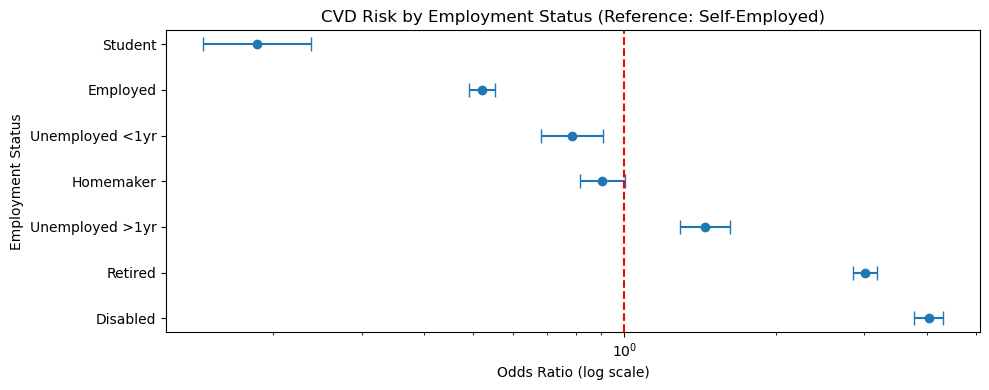


Prevalence by Employment Status:
                   Prevalence   Count
employment_status                    
Disabled             0.209581   14591
Retired              0.165355   82338
Unemployed >1yr      0.086761    4668
Self-Employed        0.061723   24772
Homemaker            0.056156    9438
Unemployed <1yr      0.049233    4631
Employed             0.033105  125813
Student              0.012070    5551

Pairwise Fisher's Exact Tests:
                            Comparison  Odds Ratio        p-value  \
27          Unemployed >1yr vs Student    7.776109   8.163182e-77   
9                  Retired vs Employed    5.786361   0.000000e+00   
26          Unemployed <1yr vs Student    4.238467   2.110607e-29   
7                 Retired vs Homemaker    3.329813  1.203355e-210   
23         Employed vs Unemployed >1yr    2.774787   1.027040e-62   
3            Self-Employed vs Employed    1.921345   7.159439e-91   
25  Unemployed <1yr vs Unemployed >1yr    1.834651   5.798704e-13   
14

<Figure size 1000x600 with 0 Axes>

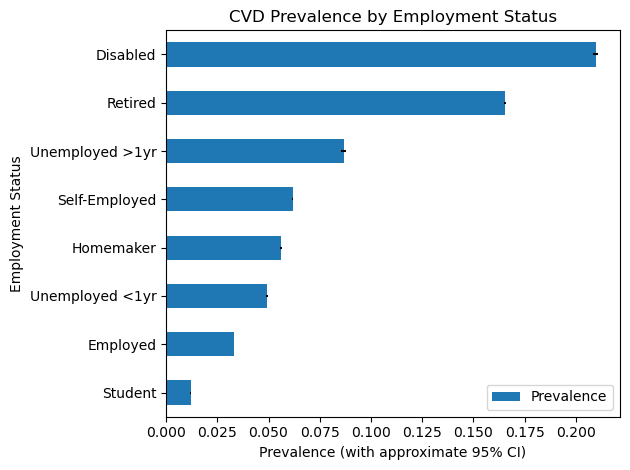

In [24]:
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
from itertools import combinations
from scipy.stats import fisher_exact

# 2. Set reference category (choose the most common or theoretically appropriate)
employment_statuses = df['employment_status'].unique()
reference = 'employed' if 'employed' in employment_statuses else employment_statuses[0]
print(f"\nUsing '{reference}' as reference category")

# Create dummy variables
dummies = pd.get_dummies(df['employment_status'], prefix='emp', drop_first=False)
X = dummies.drop(f'emp_{reference}', axis=1)  # Drop reference category
y = df['cvd']

# Add constant for intercept
X = sm.add_constant(X)

# 3. Fit Logistic Regression Model
print("\nFitting logistic regression model...")
try:
    model = sm.Logit(y, X.astype(float)).fit()
    print(model.summary())
    
    # Get odds ratios and CIs
    params = model.params
    conf = model.conf_int()
    conf.columns = ['2.5%', '97.5%']
    odds_ratios = pd.DataFrame({
        'Employment Status': [x.replace('emp_', '') for x in params.index[1:]],
        'Odds Ratio': np.exp(params[1:]),
        'Lower CI': np.exp(conf['2.5%'][1:]),
        'Upper CI': np.exp(conf['97.5%'][1:]),
        'p-value': model.pvalues[1:]
    }).sort_values('Odds Ratio', ascending=False)
    
    print("\nOdds Ratios vs Reference:")
    print(odds_ratios)
    
except Exception as e:
    print(f"\nModel fitting failed: {str(e)}")
    print("\nPossible solutions:")
    print("- Combine small employment status categories")
    print("- Try exact logistic regression for small samples")
    print("- Check for complete separation (some statuses may perfectly predict CVD)")
    
    # Show contingency table for diagnosis
    print("\nContingency table:")
    print(pd.crosstab(df['employment_status'], df['cvd']))

# 4. Visualization
if 'odds_ratios' in locals():
    plt.figure(figsize=(10, 4))
    plt.errorbar(
        x=odds_ratios['Odds Ratio'],
        y=odds_ratios['Employment Status'],
        xerr=[odds_ratios['Odds Ratio'] - odds_ratios['Lower CI'], 
              odds_ratios['Upper CI'] - odds_ratios['Odds Ratio']],
        fmt='o',
        capsize=5
    )
    plt.axvline(x=1, color='red', linestyle='--')
    plt.xscale('log')
    plt.title(f'CVD Risk by Employment Status (Reference: {reference})')
    plt.xlabel('Odds Ratio (log scale)')
    plt.ylabel('Employment Status')
    plt.tight_layout()
    plt.show()

# 5. Prevalence and Pairwise Comparisons
print("\nPrevalence by Employment Status:")
prev = df.groupby('employment_status')['cvd'].agg(['mean', 'count'])
prev.columns = ['Prevalence', 'Count']
print(prev.sort_values('Prevalence', ascending=False))

# Fisher's exact tests for all pairwise comparisons
print("\nPairwise Fisher's Exact Tests:")
results = []
statuses = df['employment_status'].unique()

for (status1, status2) in combinations(statuses, 2):
    subset = df[df['employment_status'].isin([status1, status2])]
    table = pd.crosstab(subset['employment_status'], subset['cvd'])
    
    if table.shape == (2,2):
        oddsratio, pvalue = fisher_exact(table)
        results.append({
            'Comparison': f"{status1} vs {status2}",
            'Odds Ratio': oddsratio,
            'p-value': pvalue,
            'Prevalence Diff': (subset[subset['employment_status']==status1]['cvd'].mean() - 
                              subset[subset['employment_status']==status2]['cvd'].mean())
        })

pairwise_results = pd.DataFrame(results)
pairwise_results['adj_p-value'] = multipletests(pairwise_results['p-value'], method='fdr_bh')[1]
print(pairwise_results.sort_values('Odds Ratio', ascending=False))

# 6. Alternative: Prevalence Difference Plot
plt.figure(figsize=(10, 6))
prev.sort_values('Prevalence').plot(kind='barh', y='Prevalence', 
                                  xerr=prev['Prevalence']*(1-prev['Prevalence'])/np.sqrt(prev['Count']))
plt.title('CVD Prevalence by Employment Status')
plt.xlabel('Prevalence (with approximate 95% CI)')
plt.ylabel('Employment Status')
plt.tight_layout()
plt.show()

### Disaggregation on Primary Health Insurance

Initial data check:
Unique insurance types: ['Medicare' 'Employer Plan' 'Military' 'Private Plan' 'Medigap'
 'Other Govt' 'Medicaid' 'No Coverage' 'State Plan' 'IHS' 'CHIP']

Value counts:
 primary_health_insurance
Employer Plan    111587
Medicare          82988
Private Plan      22791
Medicaid          16869
No Coverage       12331
Military          10209
State Plan         7721
Other Govt         6045
IHS                 884
Medigap             305
CHIP                 72
Name: count, dtype: int64

Missing values before cleaning:
primary_health_insurance    0
cvd                         0
dtype: int64

Using 'No Coverage' as reference category

Fitting logistic regression model...
Optimization terminated successfully.
         Current function value: 0.275084
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    cvd   No. Observations:               271802
Model:                          Logit   Df Resid

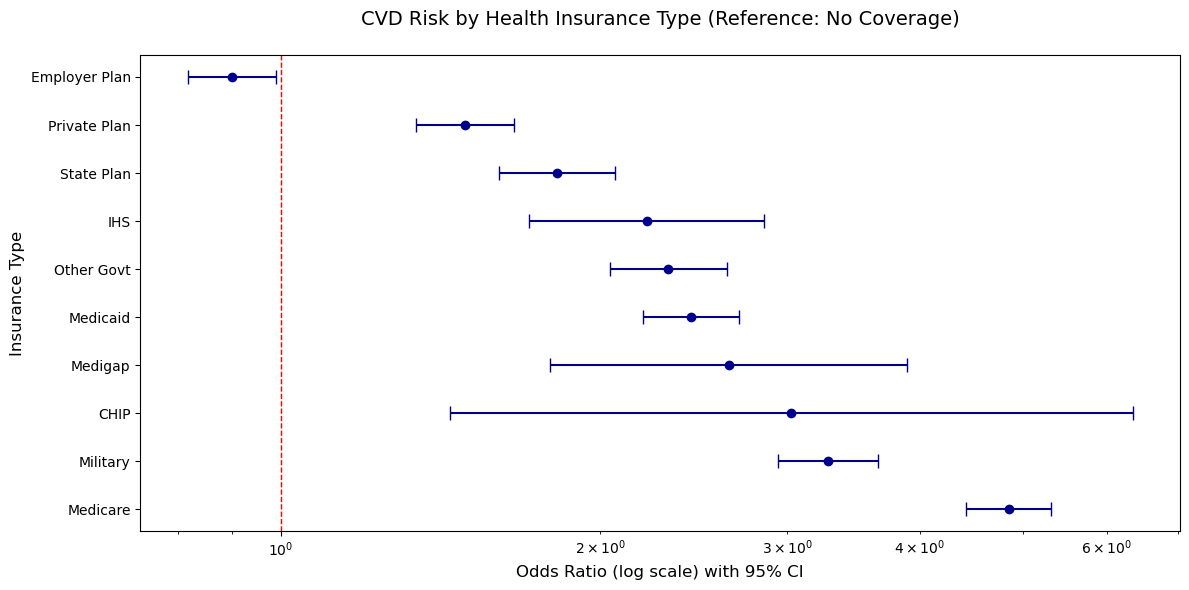


Prevalence by Insurance Type:
                          Prevalence   Count   Std Dev  CI_lower  CI_upper
primary_health_insurance                                                  
Medicare                    0.166904   82988  0.372892  0.164367  0.169441
Military                    0.119306   10209  0.324165  0.113018  0.125595
CHIP                        0.111111      72  0.316475  0.038009  0.184213
Medigap                     0.098361     305  0.298291  0.064884  0.131838
Medicaid                    0.091410   16869  0.288200  0.087061  0.095759
Other Govt                  0.087345    6045  0.282363  0.080227  0.094463
IHS                         0.083710     884  0.277110  0.065443  0.101978
State Plan                  0.069939    7721  0.255061  0.064250  0.075628
Private Plan                0.058005   22791  0.233759  0.054970  0.061040
No Coverage                 0.039656   12331  0.195158  0.036212  0.043101
Employer Plan               0.035802  111587  0.185796  0.034712  0.0

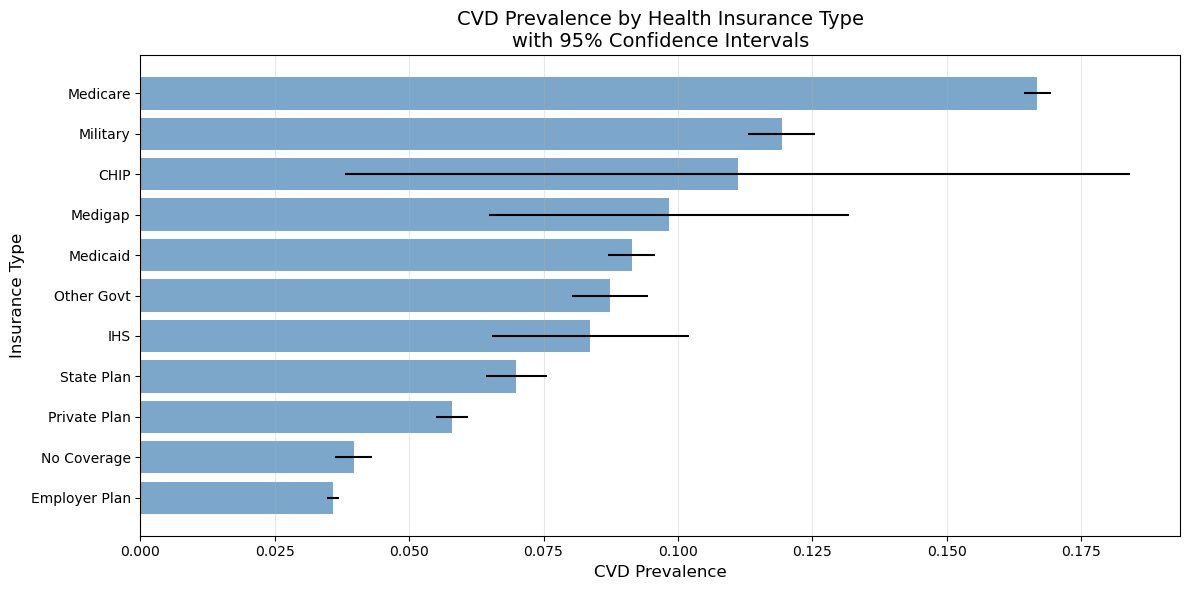

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
from itertools import combinations
from scipy.stats import fisher_exact

# 1. Data Preparation
print("Initial data check:")
print("Unique insurance types:", df['primary_health_insurance'].unique())
print("\nValue counts:\n", df['primary_health_insurance'].value_counts())

# Ensure CVD is binary numeric (0/1)
df['cvd'] = df['cvd'].astype(int)

# Handle missing data
print("\nMissing values before cleaning:")
print(df[['primary_health_insurance', 'cvd']].isnull().sum())
df = df.dropna(subset=['primary_health_insurance', 'cvd'])

# 2. Set reference category (typically 'private' if exists)
insurance_types = df['primary_health_insurance'].unique()
reference = 'No Coverage' if 'No Coverage' in insurance_types else insurance_types[0]
print(f"\nUsing '{reference}' as reference category")

# Create dummy variables
dummies = pd.get_dummies(df['primary_health_insurance'], prefix='ins', drop_first=False)
X = dummies.drop(f'ins_{reference}', axis=1)  # Drop reference category
y = df['cvd']

# Add constant for intercept
X = sm.add_constant(X)

# 3. Fit Logistic Regression Model
print("\nFitting logistic regression model...")
try:
    model = sm.Logit(y, X.astype(float)).fit()
    print(model.summary())
    
    # Get odds ratios and CIs
    params = model.params
    conf = model.conf_int()
    conf.columns = ['2.5%', '97.5%']
    odds_ratios = pd.DataFrame({
        'Insurance Type': [x.replace('ins_', '') for x in params.index[1:]],
        'Odds Ratio': np.exp(params[1:]),
        'Lower CI': np.exp(conf['2.5%'][1:]),
        'Upper CI': np.exp(conf['97.5%'][1:]),
        'p-value': model.pvalues[1:]
    }).sort_values('Odds Ratio', ascending=False)
    
    print("\nOdds Ratios vs Reference:")
    print(odds_ratios)
    
except Exception as e:
    print(f"\nModel fitting failed: {str(e)}")
    print("\nPossible solutions:")
    print("- Combine small insurance categories (e.g., 'military' with 'other')")
    print("- Try exact logistic regression if any category has <10 cases")
    print("- Check for complete separation (some insurance types may perfectly predict CVD)")
    
    # Show contingency table for diagnosis
    print("\nContingency table:")
    print(pd.crosstab(df['primary_health_insurance'], df['cvd']))

# 4. Visualization - Forest Plot
if 'odds_ratios' in locals():
    plt.figure(figsize=(12, 6))
    plt.errorbar(
        x=odds_ratios['Odds Ratio'],
        y=odds_ratios['Insurance Type'],
        xerr=[odds_ratios['Odds Ratio'] - odds_ratios['Lower CI'], 
              odds_ratios['Upper CI'] - odds_ratios['Odds Ratio']],
        fmt='o',
        capsize=5,
        color='darkblue'
    )
    plt.axvline(x=1, color='red', linestyle='--', linewidth=1)
    plt.xscale('log')
    plt.title(f'CVD Risk by Health Insurance Type (Reference: {reference})\n', fontsize=14)
    plt.xlabel('Odds Ratio (log scale) with 95% CI', fontsize=12)
    plt.ylabel('Insurance Type', fontsize=12)
    plt.grid(True, axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 5. Prevalence Analysis
print("\nPrevalence by Insurance Type:")
prev = df.groupby('primary_health_insurance')['cvd'].agg(['mean', 'count', 'std'])
prev.columns = ['Prevalence', 'Count', 'Std Dev']
prev['CI_lower'] = prev['Prevalence'] - 1.96*prev['Std Dev']/np.sqrt(prev['Count'])
prev['CI_upper'] = prev['Prevalence'] + 1.96*prev['Std Dev']/np.sqrt(prev['Count'])
print(prev.sort_values('Prevalence', ascending=False))

# 6. Pairwise Comparisons with Fisher's Exact Tests
print("\nPairwise Fisher's Exact Tests:")
results = []
insurance_types = df['primary_health_insurance'].unique()

for (ins1, ins2) in combinations(insurance_types, 2):
    subset = df[df['primary_health_insurance'].isin([ins1, ins2])]
    table = pd.crosstab(subset['primary_health_insurance'], subset['cvd'])
    
    if table.shape == (2,2):
        oddsratio, pvalue = fisher_exact(table, alternative='two-sided')
        prev_diff = (subset[subset['primary_health_insurance']==ins1]['cvd'].mean() - 
                    subset[subset['primary_health_insurance']==ins2]['cvd'].mean())
        results.append({
            'Comparison': f"{ins1} vs {ins2}",
            'Odds Ratio': oddsratio,
            'p-value': pvalue,
            'Prevalence Difference': prev_diff,
            'N1': table.iloc[0].sum(),
            'N2': table.iloc[1].sum()
        })

pairwise_results = pd.DataFrame(results)
pairwise_results['adj_p-value'] = multipletests(pairwise_results['p-value'], method='fdr_bh')[1]
print(pairwise_results.sort_values('Odds Ratio', ascending=False).head(10))

# 7. Prevalence Visualization
plt.figure(figsize=(12, 6))
prev_sorted = prev.sort_values('Prevalence', ascending=True)
plt.barh(prev_sorted.index, prev_sorted['Prevalence'], 
         xerr=[prev_sorted['Prevalence']-prev_sorted['CI_lower'], 
               prev_sorted['CI_upper']-prev_sorted['Prevalence']],
         color='steelblue', alpha=0.7)
plt.title('CVD Prevalence by Health Insurance Type\nwith 95% Confidence Intervals', fontsize=14)
plt.xlabel('CVD Prevalence', fontsize=12)
plt.ylabel('Insurance Type', fontsize=12)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 8. Small Group Analysis (if any categories have <30 cases)
small_groups = prev[prev['Count'] < 30]
if len(small_groups) > 0:
    print("\nWarning: Small sample size categories detected:")
    print(small_groups)
    print("\nConsider combining these with 'other' category:")
    print(f"df['primary_health_insurance'] = df['primary_health_insurance'].replace({list(small_groups.index): 'other'})")

## __RQ3: Lifestyle__

Tobacco Use, E-Cigarette Use, Alcohol Consumption, Physical Health Self-Assessment, Mental Health Self-Assessment, Sleep, Depression, Checkup Frequency

### Decision Tree Classifier

In [29]:
lifestyle_vars = [
    'uses_tobacco',
    'uses_e_cigarettes',
    'days_drinking_alcohol',
    'average_sleep_hours',
    'physical_health_not_good_days',
    'mental_health_not_good_days',
    'depression_diagnosis',
    'last_doctor_visit',
]

In [33]:
# Prepare data
# X = pd.get_dummies(df[lifestyle_vars], drop_first=True)
X = df[lifestyle_vars]
y = df['cvd']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, make_scorer

# Define pipeline
categorical_cols = ['uses_tobacco', 'uses_e_cigarettes', 'depression_diagnosis', 'last_doctor_visit']
numerical_cols = ['days_drinking_alcohol', 'average_sleep_hours', 'physical_health_not_good_days', 'mental_health_not_good_days']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='drop'
)

# Define pipeline with Decision Tree Classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dtree', DecisionTreeClassifier(class_weight={0: 1, 1: 4}, random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'dtree__max_depth': [5, 8, 10, 15],
    'dtree__min_samples_leaf': [0.01, 0.02, 0.05],
    'dtree__min_impurity_decrease': [0.0001, 0.0005, 0.001]
}

# Define scoring function
scorer = make_scorer(roc_auc_score)

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

# Print best parameters and AUC
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best AUC: {grid_search.best_score_:.3f}")

# Train best model and get feature importances
best_model = grid_search.best_estimator_
feature_names = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist() + numerical_cols
importance = pd.Series(best_model.named_steps['dtree'].feature_importances_, index=feature_names)
print(importance.sort_values(ascending=False))

Best Parameters: {'dtree__max_depth': 5, 'dtree__min_impurity_decrease': 0.0001, 'dtree__min_samples_leaf': 0.01}
Best AUC: 0.570
physical_health_not_good_days     0.616777
last_doctor_visit_<1yr            0.223817
days_drinking_alcohol             0.108850
mental_health_not_good_days       0.050556
uses_tobacco_Never                0.000000
average_sleep_hours               0.000000
last_doctor_visit_Never           0.000000
last_doctor_visit_5+ yrs          0.000000
last_doctor_visit_2-5yrs          0.000000
uses_tobacco_Daily                0.000000
depression_diagnosis_Yes          0.000000
depression_diagnosis_No           0.000000
uses_e_cigarettes_Occasionally    0.000000
uses_e_cigarettes_Never           0.000000
uses_e_cigarettes_Former          0.000000
uses_e_cigarettes_Daily           0.000000
uses_tobacco_Occasionally         0.000000
last_doctor_visit_1-2yrs          0.000000
dtype: float64


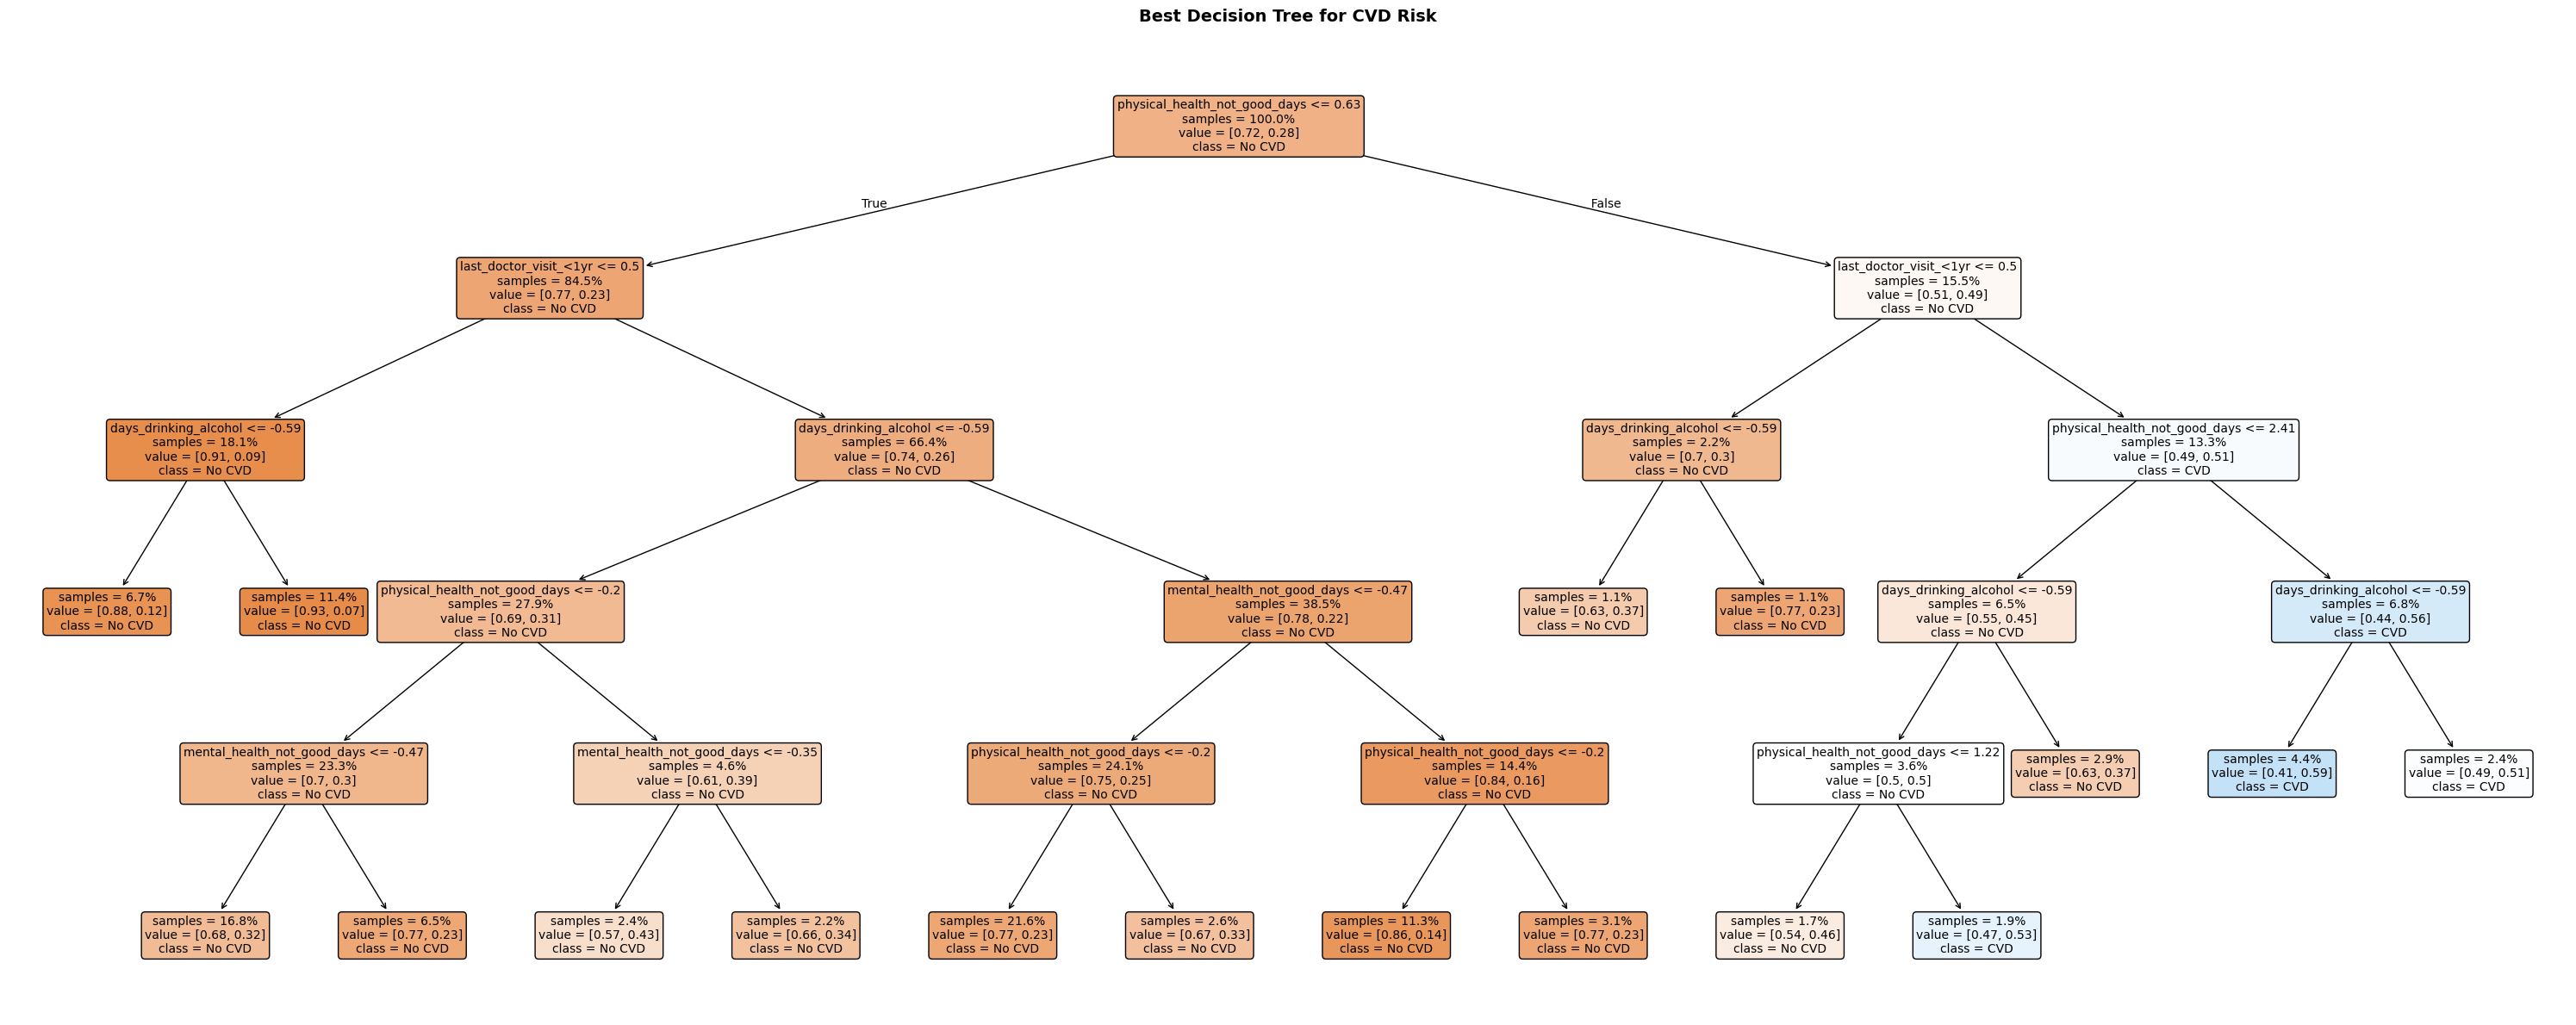

In [73]:
# Get the best model
best_model = grid_search.best_estimator_

# Get the feature names
feature_names = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist() + numerical_cols

# Plot the best tree
plt.figure(figsize=(30, 12), dpi=100)
ax = plt.gca()

plot_tree(
    best_model.named_steps['dtree'],
    feature_names=feature_names,
    class_names=['No CVD', 'CVD'],
    filled=True,
    rounded=True,
    proportion=True,
    impurity=False,
    fontsize=10,
    precision=2,
    ax=ax,
    max_depth=5  # Limit the depth for better visualization
)

plt.title("Best Decision Tree for CVD Risk", fontsize=14, pad=20, weight='bold')
plt.tight_layout()
plt.show()

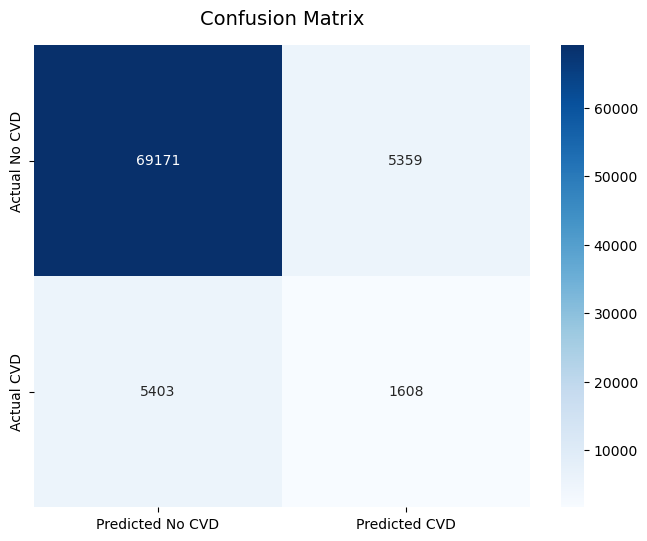

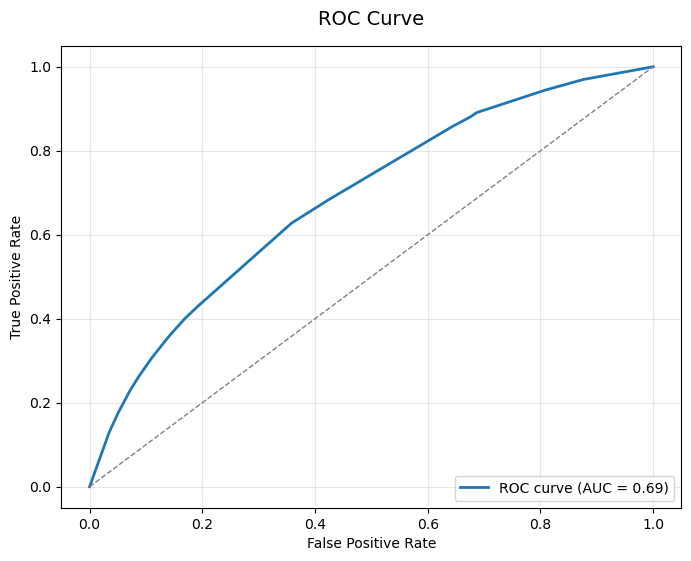

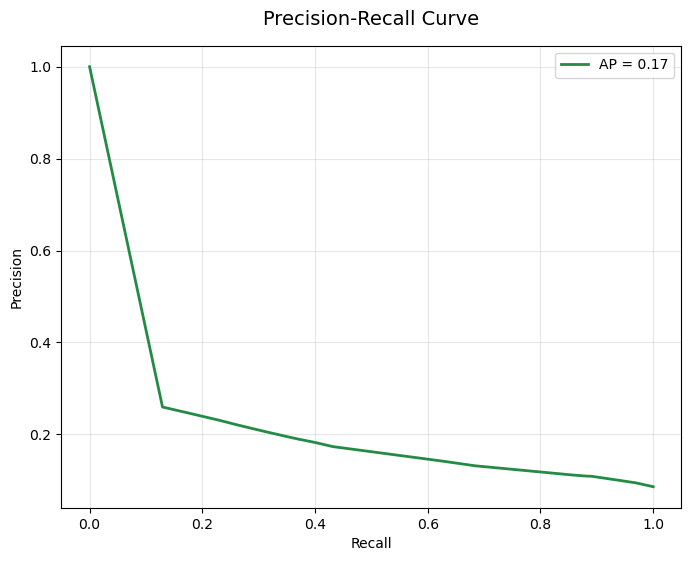


Classification Report:
              precision    recall  f1-score   support

      No CVD       0.93      0.93      0.93     74530
         CVD       0.23      0.23      0.23      7011

    accuracy                           0.87     81541
   macro avg       0.58      0.58      0.58     81541
weighted avg       0.87      0.87      0.87     81541


Key Metrics:
- Test Accuracy: 0.868
- ROC AUC: 0.686
- Average Precision: 0.165
- CVD Detection Rate (Recall): 0.229


In [66]:
# Get the best model
best_model = grid_search.best_estimator_

# Process test data
X_test_processed = best_model.named_steps['preprocessor'].transform(X_test)

# 1. Generate predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # CVD probabilities

# 2. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No CVD', 'Predicted CVD'],
            yticklabels=['Actual No CVD', 'Actual CVD'])
plt.title("Confusion Matrix", fontsize=14, pad=15)
plt.show()

from sklearn.metrics import roc_auc_score

# 3. ROC Curve 
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=14, pad=15)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# 4. Precision-Recall Curve (Green)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='#238b45', lw=2,
         label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=14, pad=15)
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.show()

# 5. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No CVD', 'CVD']))

# 6. Key Metrics
print("\nKey Metrics:")
print(f"- Test Accuracy: {best_model.score(X_test, y_test):.3f}")
print(f"- ROC AUC: {roc_auc:.3f}")
print(f"- Average Precision: {avg_precision:.3f}")
print(f"- CVD Detection Rate (Recall): {cm[1,1]/cm[1,:].sum():.3f}")